<a href="https://colab.research.google.com/github/tiliniprabani/CSE-Research/blob/main/csc_research_dividend_data_analyzis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FixedLocator  # Add this import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

d_df = pd.read_csv('/content/drive/MyDrive/cse-research/stock-price-backup /cash_dividend_data_v1.csv', index_col='id')
d_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,agm,announcement_category,anu_category_id,approved_date,company,created_date,date_of_announcement,final_dividend,first_and_final,group_key,...,sec_id,symbol,type_first_int,type_fourth_int,type_other,type_second_int,type_third_int,voting_div_per_share,xc,xd
id,,,,,,,,,,,,,,,,,,,,,
1117,NaN,CASH DIVIDEND,5,1561374089867,VALLIBEL POWER ERATHNA PLC,24-06-2019 04:31:29 PM,24-06-2019,False,False,CASH DIVIDEND,...,454,VPEL,True,False,False,False,False,0.3,NaN,03-07-2019
1127,25-07-2019,CASH DIVIDEND,5,1561458120671,CARGILLS (CEYLON) PLC,25-06-2019 03:52:00 PM,25-06-2019,True,False,CASH DIVIDEND,...,457,CARG,False,False,False,False,False,4.1,NaN,26-07-2019
1135,26-08-2019,CASH DIVIDEND,5,1561462633502,BANSEI ROYAL RESORTS HIKKADUWA PLC,25-06-2019 05:07:13 PM,25-06-2019,False,True,CASH DIVIDEND,...,1322,BRR,False,False,False,False,False,0.3,NaN,27-08-2019


In [ ]:
d_df.columns

Index(['agm', 'announcement_category', 'anu_category_id', 'approved_date',
       'company', 'created_date', 'date_of_announcement', 'final_dividend',
       'first_and_final', 'group_key', 'is_new', 'non_voting_div_per_share',
       'payment', 'record_date', 'remarks', 'sec_id', 'symbol',
       'type_first_int', 'type_fourth_int', 'type_other', 'type_second_int',
       'type_third_int', 'voting_div_per_share', 'xc', 'xd'],
      dtype='object')

In [ ]:
#--- get necessary data to one df
d_df_croped = d_df[['company', 'date_of_announcement', 'voting_div_per_share', 'xd', 'non_voting_div_per_share', 'payment', 'symbol']]
d_df_croped.head(5)

,company,date_of_announcement,voting_div_per_share,xd,non_voting_div_per_share,payment,symbol
id,,,,,,,
1117,VALLIBEL POWER ERATHNA PLC,24-06-2019,0.3,03-07-2019,NaN,12-07-2019,VPEL
1127,CARGILLS (CEYLON) PLC,25-06-2019,4.1,26-07-2019,NaN,05-08-2019,CARG
1135,BANSEI ROYAL RESORTS HIKKADUWA PLC,25-06-2019,0.3,27-08-2019,NaN,04-09-2019,BRR
1145,ACL PLASTICS PLC,26-06-2019,6.0,05-07-2019,NaN,17-07-2019,APLA
1204,ALLIANCE FINANCE COMPANY PLC,28-06-2019,1.0,01-08-2019,NaN,09-08-2019,ALLI


In [ ]:
#--- format date
# Format date correctly by specifying dayfirst=True | otherwise there will be an error
d_df_croped['date_of_announcement'] = pd.to_datetime(d_df_croped['date_of_announcement'], dayfirst=True)
d_df_croped['xd'] = pd.to_datetime(d_df_croped['xd'], dayfirst=True)
d_df_croped['payment'] = pd.to_datetime(d_df_croped['payment'], dayfirst=True)

# Sort by announcement date
d_df_croped = d_df_croped.sort_values('date_of_announcement')

<ipython-input-41-95759d720bd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_df_croped['date_of_announcement'] = pd.to_datetime(d_df_croped['date_of_announcement'], dayfirst=True)
<ipython-input-41-95759d720bd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_df_croped['xd'] = pd.to_datetime(d_df_croped['xd'], dayfirst=True)
<ipython-input-41-95759d720bd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
d_df_croped.shape

(1176, 7)

In [ ]:
d_df_croped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1117 to 30114
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   company                   1176 non-null   object        
 1   date_of_announcement      1176 non-null   datetime64[ns]
 2   voting_div_per_share      1146 non-null   float64       
 3   xd                        1173 non-null   datetime64[ns]
 4   non_voting_div_per_share  172 non-null    float64       
 5   payment                   1176 non-null   datetime64[ns]
 6   symbol                    1176 non-null   object        
dtypes: datetime64[ns](3), float64(2), object(2)
memory usage: 73.5+ KB


In [ ]:
((d_df_croped.isnull().sum()) / len(d_df_croped)) * 100

,0
company,0.000000
date_of_announcement,0.000000
voting_div_per_share,2.551020
xd,0.255102
non_voting_div_per_share,85.374150
payment,0.000000
symbol,0.000000


In [ ]:
d_df_croped

,company,date_of_announcement,voting_div_per_share,xd,non_voting_div_per_share,payment,symbol
id,,,,,,,
1117,VALLIBEL POWER ERATHNA PLC,2019-06-24,0.30,2019-07-03,NaN,2019-07-12,VPEL
1127,CARGILLS (CEYLON) PLC,2019-06-25,4.10,2019-07-26,NaN,2019-08-05,CARG
1135,BANSEI ROYAL RESORTS HIKKADUWA PLC,2019-06-25,0.30,2019-08-27,NaN,2019-09-04,BRR
1145,ACL PLASTICS PLC,2019-06-26,6.00,2019-07-05,NaN,2019-07-17,APLA
1204,ALLIANCE FINANCE COMPANY PLC,2019-06-28,1.00,2019-08-01,NaN,2019-08-09,ALLI
...,...,...,...,...,...,...,...
29990,SARVODAYA DEVELOPMENT FINANCE PLC,2025-03-11,0.65,2025-03-21,0.0,2025-04-10,SDF
30014,WATAWALA PLANTATIONS PLC,2025-03-12,1.40,2025-03-24,0.0,2025-04-11,WATA
30071,EX-PACK CORRUGATED CARTONS PLC,2025-03-17,0.26,2025-03-26,0.0,2025-04-17,PACK


In [ ]:
# number of unique categories in a column
d_df_croped.symbol.nunique()

196

In [ ]:
#--- unique categories in symbol
d_df_croped.symbol.unique()

array(['VPEL', 'CARG', 'BRR', 'APLA', 'ALLI', 'DIST', 'CTHR', 'CTLD',
       'CIND', 'SFCL', 'ONAL', 'TJL', 'ASHO', 'TKYO', 'SWAD', 'TYRE',
       'RHL', 'KZOO', 'COCO', 'RAL', 'HARI', 'COCR', 'KCAB', 'VLL',
       'MCPL', 'BPPL', 'CTEA', 'ACL', 'SHL', 'SOY', 'CFVF', 'LVEN', 'LMF',
       'BREW', 'RPBH', 'CTC', 'ASIY', 'TANG', 'LALU', 'ASPH', 'LLUB',
       'GEST', 'RFL', 'CDB', 'NEH', 'ELPL', 'ASPM', 'SHAW', 'RWSL',
       'ABAN', 'COLO', 'LITE', 'SLND', 'EBCR', 'MERC', 'LPRT', 'CARS',
       'PAP', 'HUNT', 'ABL', 'HPFL', 'MGT', 'DIPD', 'PINS', 'HAYC',
       'HEXP', 'BUKI', 'UCAR', 'COMB', 'LHCL', 'JKH', 'AEL', 'MELS',
       'COMD', 'CFIN', 'HASU', 'REXP', 'HNB', 'PLC', 'CIC', 'SAMP', 'CCS',
       'NDB', 'DFCC', 'OSEA', 'CSD', 'SEYB', 'KFP', 'UBC', 'NTB', 'UAL',
       'NEST', 'CINS', 'TRAN', 'AHPL', 'REG', 'SINS', 'GRAN', 'TAFL',
       'SINI', 'LVEF', 'SPEN', 'WATA', 'SUN', 'PDL', 'GLAS', 'SDB',
       'DIAL', 'SLTL', 'ETWO', 'CHL', 'LION', 'HAYL', 'TPL', 'CINV',
       'GUAR', '

In [ ]:
# categories wise number of observations in a column
d_df_croped.symbol.value_counts().head(10)

,count
symbol,
CTC,28
DIPD,22
HAYC,22
MGT,20
LLUB,19
JKH,17
DIST,16
TPL,15
KVAL,14


In [ ]:
ctc_df = d_df_croped[d_df_croped.symbol == 'CTC'].copy()
ctc_df

,company,date_of_announcement,voting_div_per_share,xd,non_voting_div_per_share,payment,symbol
id,,,,,,,
1799,CEYLON TOBACCO COMPANY PLC,2019-08-08,20.00,2019-08-21,NaN,2019-08-29,CTC
2843,CEYLON TOBACCO COMPANY PLC,2019-11-08,21.00,2019-11-21,NaN,2019-11-28,CTC
3287,CEYLON TOBACCO COMPANY PLC,2019-12-31,20.00,2020-01-13,NaN,2020-01-23,CTC
3792,CEYLON TOBACCO COMPANY PLC,2020-02-26,12.13,2020-05-04,NaN,2020-05-14,CTC
4434,CEYLON TOBACCO COMPANY PLC,2020-05-14,19.00,2020-05-26,NaN,2020-06-04,CTC
4443,CEYLON TOBACCO COMPANY PLC,2020-05-14,NaN,2020-06-30,NaN,2020-07-08,CTC
6002,CEYLON TOBACCO COMPANY PLC,2020-08-14,15.00,2020-08-25,NaN,2020-09-04,CTC
7185,CEYLON TOBACCO COMPANY PLC,2020-11-10,19.00,2020-11-19,NaN,2020-12-09,CTC
7914,CEYLON TOBACCO COMPANY PLC,2020-12-31,18.50,2021-01-12,NaN,2021-01-22,CTC


In [ ]:
#--- get not NaN raws
ctc_df = ctc_df[ctc_df['voting_div_per_share'].notna()]
ctc_df

,company,date_of_announcement,voting_div_per_share,xd,non_voting_div_per_share,payment,symbol
id,,,,,,,
1799,CEYLON TOBACCO COMPANY PLC,2019-08-08,20.00,2019-08-21,NaN,2019-08-29,CTC
2843,CEYLON TOBACCO COMPANY PLC,2019-11-08,21.00,2019-11-21,NaN,2019-11-28,CTC
3287,CEYLON TOBACCO COMPANY PLC,2019-12-31,20.00,2020-01-13,NaN,2020-01-23,CTC
3792,CEYLON TOBACCO COMPANY PLC,2020-02-26,12.13,2020-05-04,NaN,2020-05-14,CTC
4434,CEYLON TOBACCO COMPANY PLC,2020-05-14,19.00,2020-05-26,NaN,2020-06-04,CTC
6002,CEYLON TOBACCO COMPANY PLC,2020-08-14,15.00,2020-08-25,NaN,2020-09-04,CTC
7185,CEYLON TOBACCO COMPANY PLC,2020-11-10,19.00,2020-11-19,NaN,2020-12-09,CTC
7914,CEYLON TOBACCO COMPANY PLC,2020-12-31,18.50,2021-01-12,NaN,2021-01-22,CTC
8617,CEYLON TOBACCO COMPANY PLC,2021-02-16,11.35,2021-05-28,NaN,2021-06-17,CTC


default plot

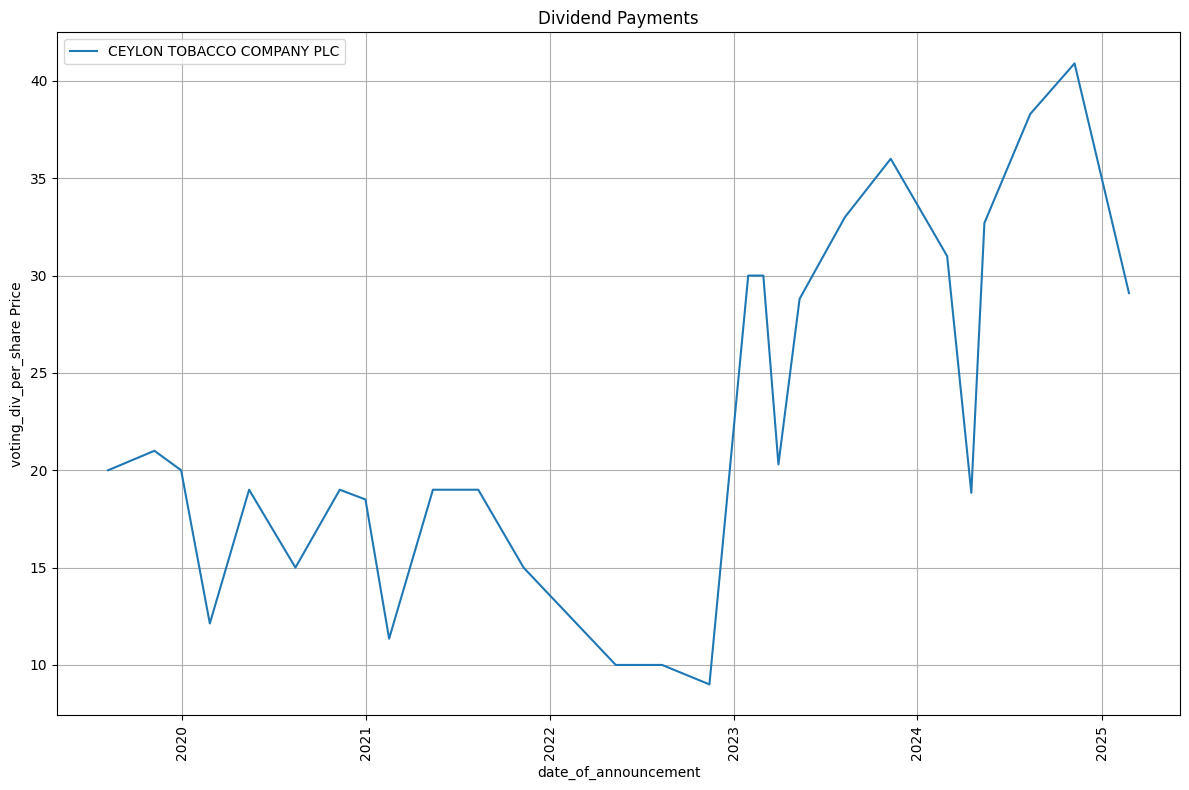

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ctc_df['date_of_announcement'], ctc_df['voting_div_per_share'], label=ctc_df.company.head(1).values[0])
# plt.plot(df2['trade_date'], df2['close'], label='SAMP.N0000')

plt.xlabel('date_of_announcement')
plt.ylabel('voting_div_per_share Price')
plt.title('Dividend Payments')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

Add full date for x-axis label

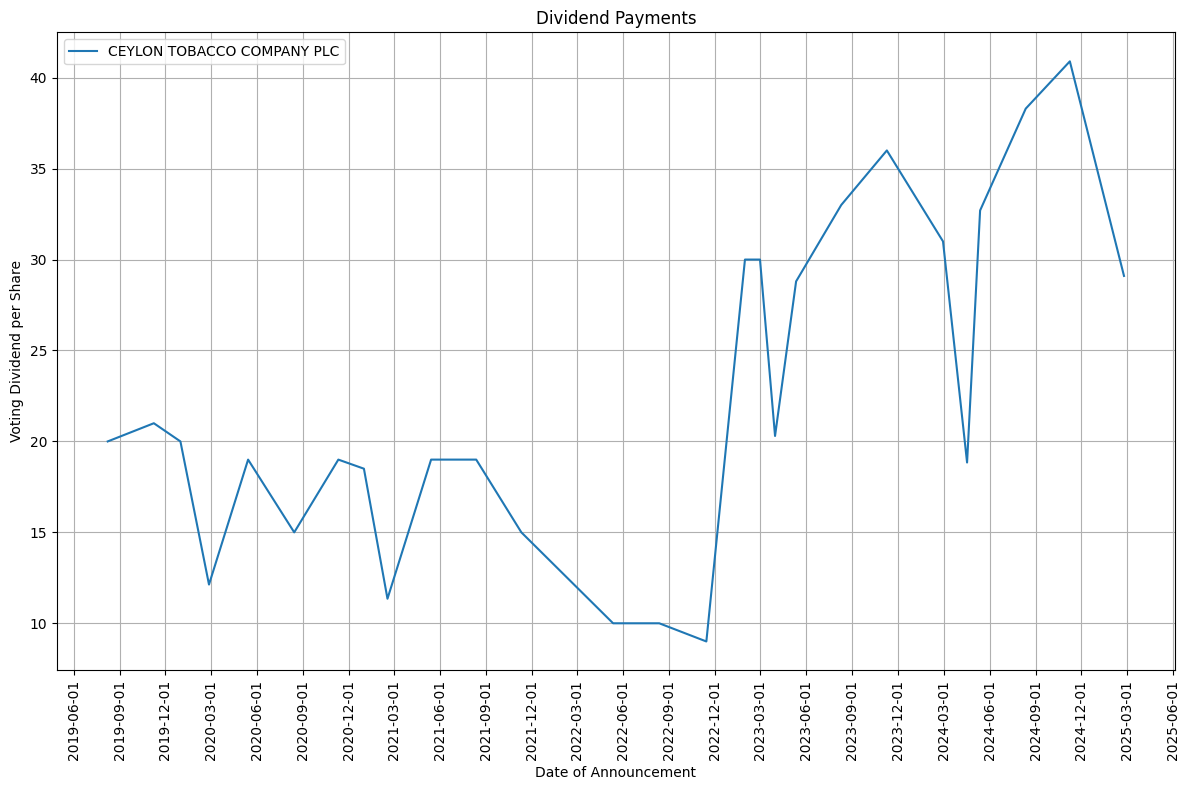

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,8))

plt.plot(ctc_df['date_of_announcement'], ctc_df['voting_div_per_share'], label=ctc_df.company.head(1).values[0])

# Format x-axis to show full dates
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format: Year-Month-Day
plt.gca().xaxis.set_major_formatter(date_format)

# If you have many dates, you might want to use a locator to avoid overcrowding
# Adjust the interval based on your date range
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months

plt.xlabel('Date of Announcement')
plt.ylabel('Voting Dividend per Share')
plt.title('Dividend Payments')
plt.legend()
plt.xticks(rotation=90)  # 45 degrees often works better than 90 for readability
plt.tight_layout()
plt.grid(True)
plt.show()

Add data point dates for x-axis label

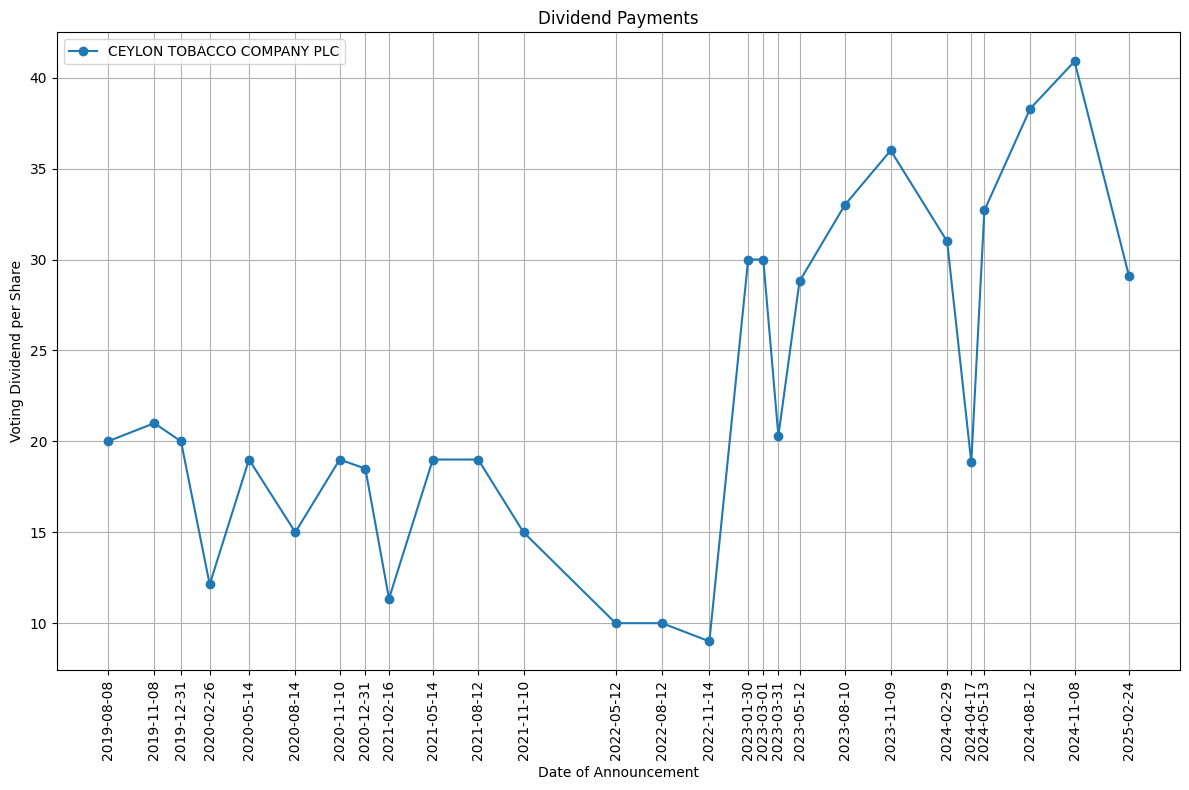

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FixedLocator  # Add this import

plt.figure(figsize=(12,8))
plt.plot(ctc_df['date_of_announcement'], ctc_df['voting_div_per_share'], label=ctc_df.company.head(1).values[0], marker='o')

# Use the actual data points as tick locations
plt.gca().xaxis.set_major_locator(FixedLocator(mdates.date2num(ctc_df['date_of_announcement'])))

# Format the dates
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date of Announcement')
plt.ylabel('Voting Dividend per Share')
plt.title('Dividend Payments')
plt.legend()
plt.xticks(rotation=90)  # Angled for better readability
plt.tight_layout()
plt.grid(True)
plt.show()

attempt to display only data point values on y axia

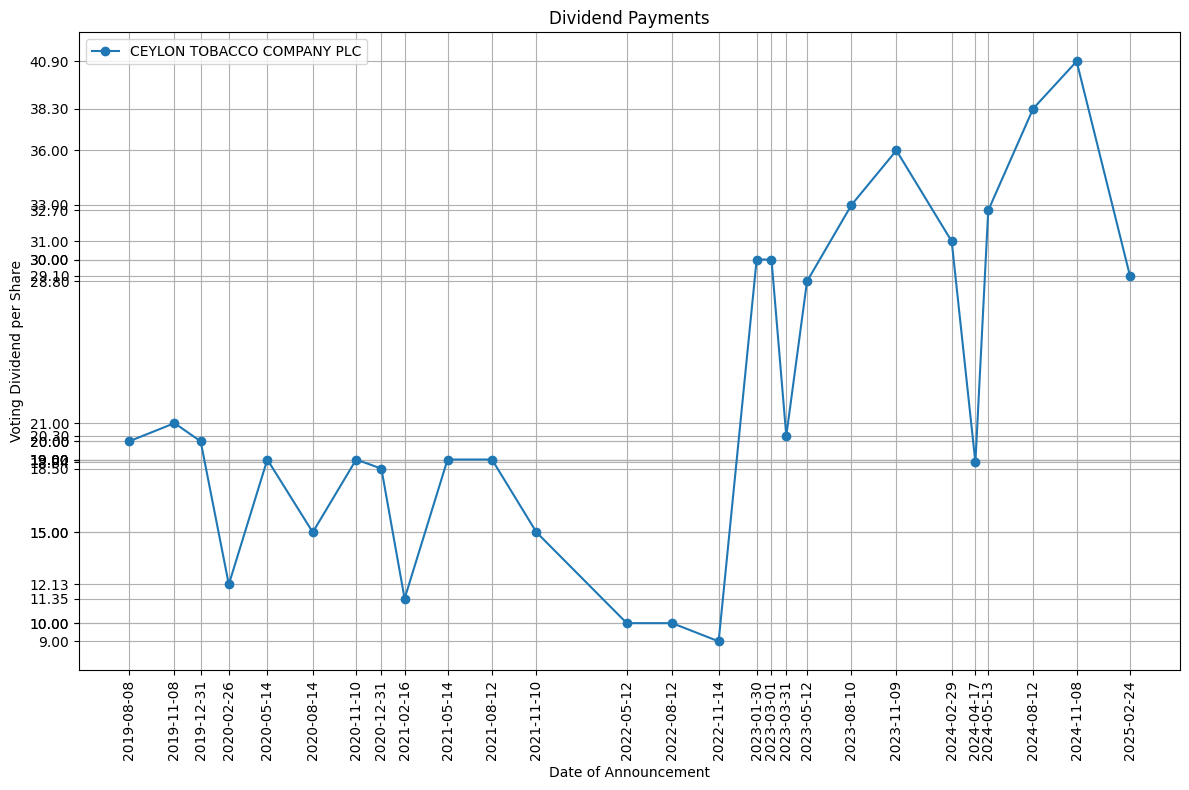

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FixedLocator  # Add this import

plt.figure(figsize=(12,8))
plt.plot(ctc_df['date_of_announcement'], ctc_df['voting_div_per_share'], label=ctc_df.company.head(1).values[0], marker='o')

# Use the actual data points as tick locations
plt.gca().xaxis.set_major_locator(FixedLocator(mdates.date2num(ctc_df['date_of_announcement'])))
plt.gca().yaxis.set_major_locator(FixedLocator(ctc_df['voting_div_per_share']))

# Format the dates
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date of Announcement')
plt.ylabel('Voting Dividend per Share')
plt.title('Dividend Payments')
plt.legend()
plt.xticks(rotation=90)  # Angled for better readability
plt.tight_layout()
plt.grid(True)
plt.show()

# Function to draw plot for any company

In [ ]:
# function to draw plots for any company
def draw_plot_for_symbol(symbol):
  df = d_df_croped[d_df_croped.symbol == symbol].copy()

  #--- get not NaN raws
  df = df[df['voting_div_per_share'].notna()]
  print(df)

  #--- draw plot
  plt.figure(figsize=(12,8))
  plt.plot(df['date_of_announcement'], df['voting_div_per_share'], label=df.company.head(1).values[0], marker='o')

  # Use the actual data points as tick locations
  plt.gca().xaxis.set_major_locator(FixedLocator(mdates.date2num(df['date_of_announcement'])))
  plt.gca().yaxis.set_major_locator(FixedLocator(df['voting_div_per_share']))

  # Format the dates
  date_format = mdates.DateFormatter('%Y-%m-%d')
  plt.gca().xaxis.set_major_formatter(date_format)

  plt.xlabel('Date of Announcement')
  plt.ylabel('Voting Dividend per Share')
  plt.title('Dividend Payments')
  plt.legend()
  plt.xticks(rotation=90)  # Angled for better readability
  plt.tight_layout()
  plt.grid(True)

  # plt.savefig(f'/content/drive/MyDrive/cse-research/stock-price-backup /dividend-plots-for-symbols/{symbol}.png') # for all cpmpanies
  plt.savefig(f'/content/drive/MyDrive/cse-research/processed-data-files/increasing-divided-paying-companies-plots/{symbol}.png') # for incrasing div pay companies

  plt.show()


In [ ]:
# draw_plot_for_symbol('SAMP')

In [ ]:
for symbol in d_df_croped.symbol.unique():
  # draw_plot_for_symbol(symbol)  # un comment this for save all plots to the google drive

SyntaxError: incomplete input (<ipython-input-57-cd377e90e5b9>, line 2)

# Find Grwoing Dividend Paying Companies

In [ ]:
def analyze_dividend_trends(df):

    results = []

    for symbol, group in df.groupby('symbol'):
        valid_data = group[group['voting_div_per_share'].notna()].sort_values('date_of_announcement')

        if len(valid_data) >= 3:
            # Convert dates to numerical form for regression
            x = (valid_data['date_of_announcement'] - valid_data['date_of_announcement'].min()).dt.days
            y = valid_data['voting_div_per_share']

            # Calculate linear regression
            slope, intercept = np.polyfit(x, y, 1)
            r_squared = np.corrcoef(x, y)[0, 1]**2

            # Annual growth rate (assuming x is in days)
            annual_growth_rate = slope * 365 / intercept * 100 if intercept != 0 else float('inf')

            # Add to results if slope is positive and correlation is strong
            if slope > 0 and r_squared > 0.7:
                results.append({
                    'symbol': symbol,
                    'company': valid_data['company'].iloc[0],
                    'num_payments': len(valid_data),
                    'slope': slope,
                    'r_squared': r_squared,
                    'annual_growth_rate': annual_growth_rate
                })

    result_df = pd.DataFrame(results).sort_values('annual_growth_rate', ascending=False)
    return result_df

In [ ]:
best_cmp_df = analyze_dividend_trends(d_df_croped)
best_cmp_df

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,symbol,company,num_payments,slope,r_squared,annual_growth_rate
5,CARS,CARSON CUMBERBATCH PLC,7,0.002032,0.791312,905.811213
12,EXT,EXTERMINATORS PLC,3,0.001164,0.999577,627.864494
4,ASPM,AITKEN SPENCE PLANTATION MANAGEMENTS PLC,5,0.009526,0.895001,426.157760
13,HBS,HSENID BUSINESS SOLUTIONS PLC,3,0.001335,0.825016,302.746975
26,TAFL,THREE ACRE FARMS PLC,9,0.011982,0.817280,121.276258
1,ABAN,ABANS ELECTRICALS PLC,6,0.003706,0.727126,114.146516
18,LVEF,LVL ENERGY FUND PLC,3,0.000400,0.875029,95.983248
25,SPEN,AITKEN SPENCE PLC,7,0.002265,0.777784,68.130734
2,APLA,ACL PLASTICS PLC,6,0.007877,0.928354,64.290938
16,LIOC,LANKA IOC PLC,7,0.004025,0.970658,63.970846


store plot all the increasingly divided paying companies

In [ ]:
best_cmp_df =  best_cmp_df.sort_values('num_payments', ascending=False)
# best_cmp_df.to_csv('/content/drive/MyDrive/cse-research/processed-data-files/increasing-divided-paying-companies.csv', index=False)

plot all the increasingly divided paying companies

                         company date_of_announcement  voting_div_per_share  \
id                                                                            
2610   UNION CHEMICALS LANKA PLC           2019-10-09                   9.0   
5392   UNION CHEMICALS LANKA PLC           2020-07-06                  12.0   
7214   UNION CHEMICALS LANKA PLC           2020-11-12                  15.0   
9487   UNION CHEMICALS LANKA PLC           2021-04-27                  14.0   
12015  UNION CHEMICALS LANKA PLC           2021-10-11                  15.0   
14689  UNION CHEMICALS LANKA PLC           2022-05-04                  10.0   
17269  UNION CHEMICALS LANKA PLC           2022-10-11                  15.0   
19284  UNION CHEMICALS LANKA PLC           2023-05-02                  17.0   
21648  UNION CHEMICALS LANKA PLC           2023-10-13                  18.0   
24072  UNION CHEMICALS LANKA PLC           2024-05-02                  27.0   
24425  UNION CHEMICALS LANKA PLC           2024-05-2

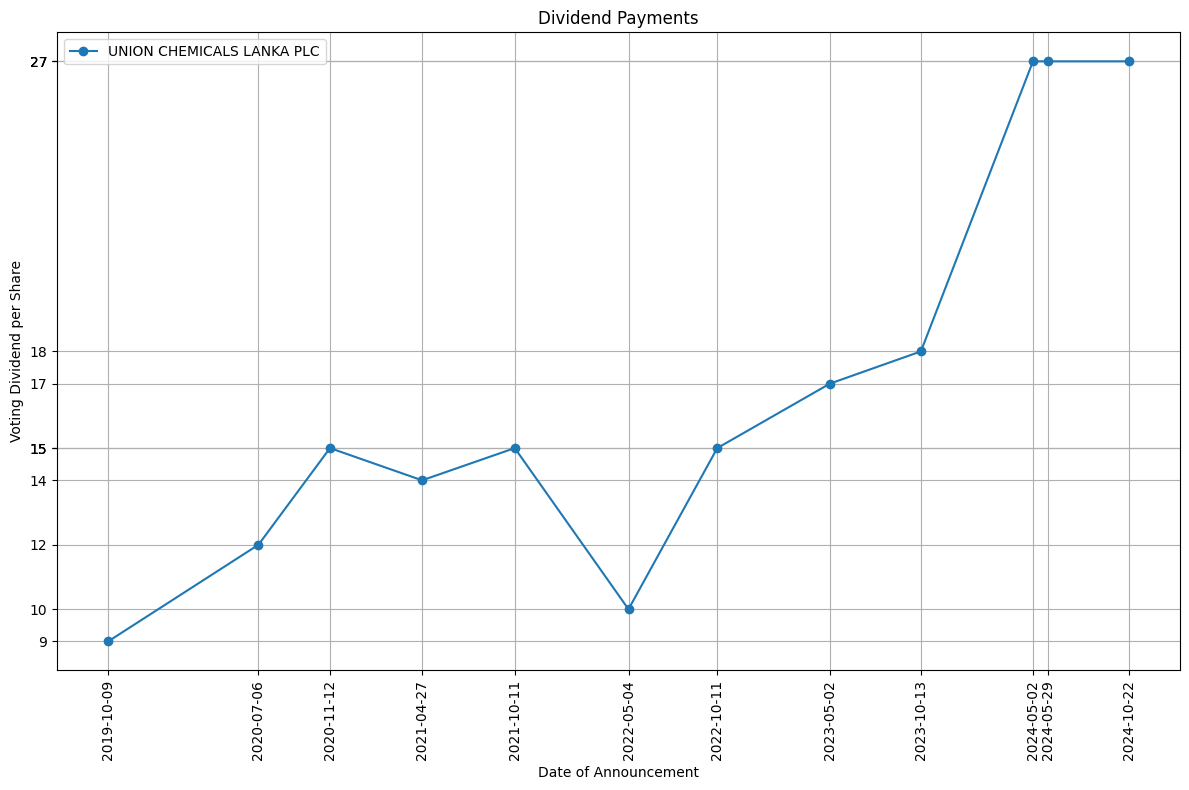

                    company date_of_announcement  voting_div_per_share  \
id                                                                       
4373   THREE ACRE FARMS PLC           2020-05-11                   5.5   
7224   THREE ACRE FARMS PLC           2020-11-13                   5.5   
8442   THREE ACRE FARMS PLC           2021-02-05                  11.0   
9343   THREE ACRE FARMS PLC           2021-04-08                   5.5   
13813  THREE ACRE FARMS PLC           2022-02-24                  10.0   
20646  THREE ACRE FARMS PLC           2023-08-10                  12.0   
22997  THREE ACRE FARMS PLC           2024-02-01                  16.0   
27809  THREE ACRE FARMS PLC           2024-11-13                  25.0   
29136  THREE ACRE FARMS PLC           2025-01-17                  30.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
4373  2020-05-20                       NaN 2020-06-01   TAF

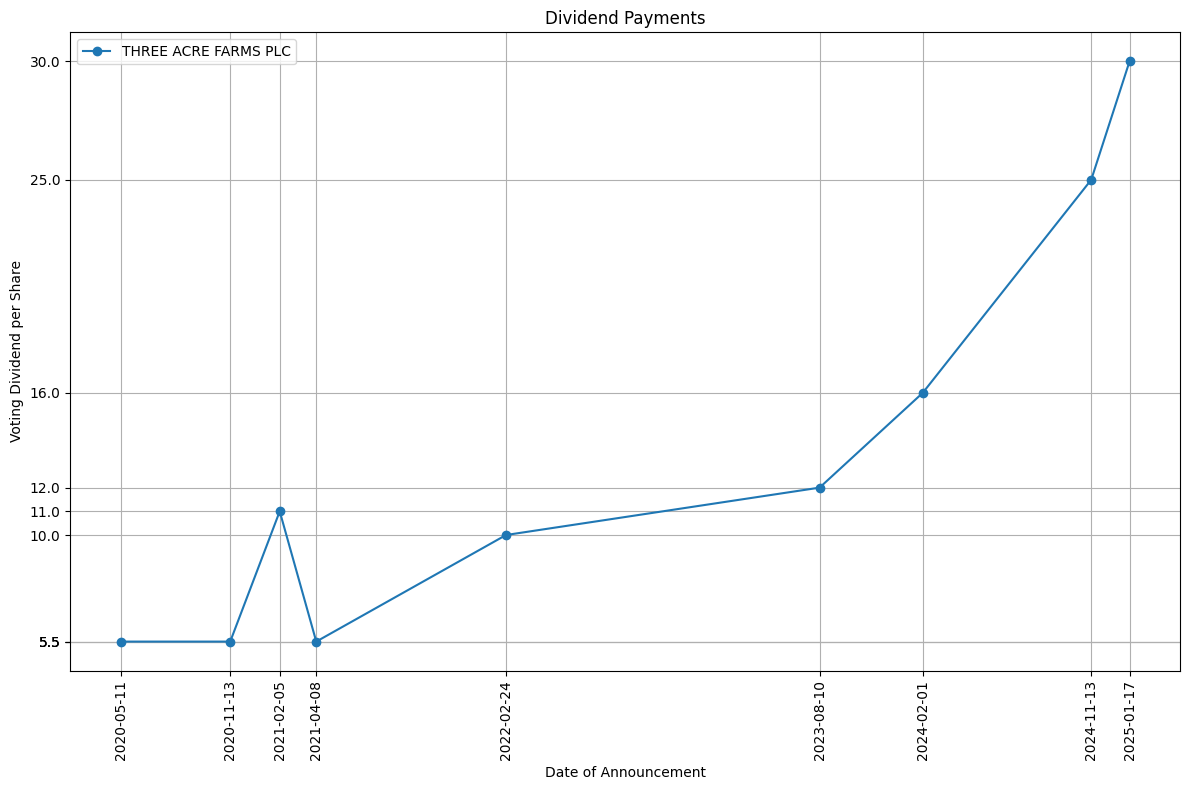

                company date_of_announcement  voting_div_per_share         xd  \
id                                                                              
3622   CIC HOLDINGS PLC           2020-02-07                  1.00 2020-02-19   
6069   CIC HOLDINGS PLC           2020-08-19                  1.00 2020-08-28   
8900   CIC HOLDINGS PLC           2021-03-09                  1.00 2021-03-19   
9728   CIC HOLDINGS PLC           2021-05-21                  1.25 2021-07-01   
12143  CIC HOLDINGS PLC           2021-10-22                  1.00 2021-11-02   
14909  CIC HOLDINGS PLC           2022-05-23                  1.00 2022-07-01   
19534  CIC HOLDINGS PLC           2023-05-24                  2.50 2023-07-04   
24412  CIC HOLDINGS PLC           2024-05-28                  2.50 2024-07-01   

       non_voting_div_per_share    payment symbol  
id                                                 
3622                       1.00 2020-02-28    CIC  
6069                       1.00 2

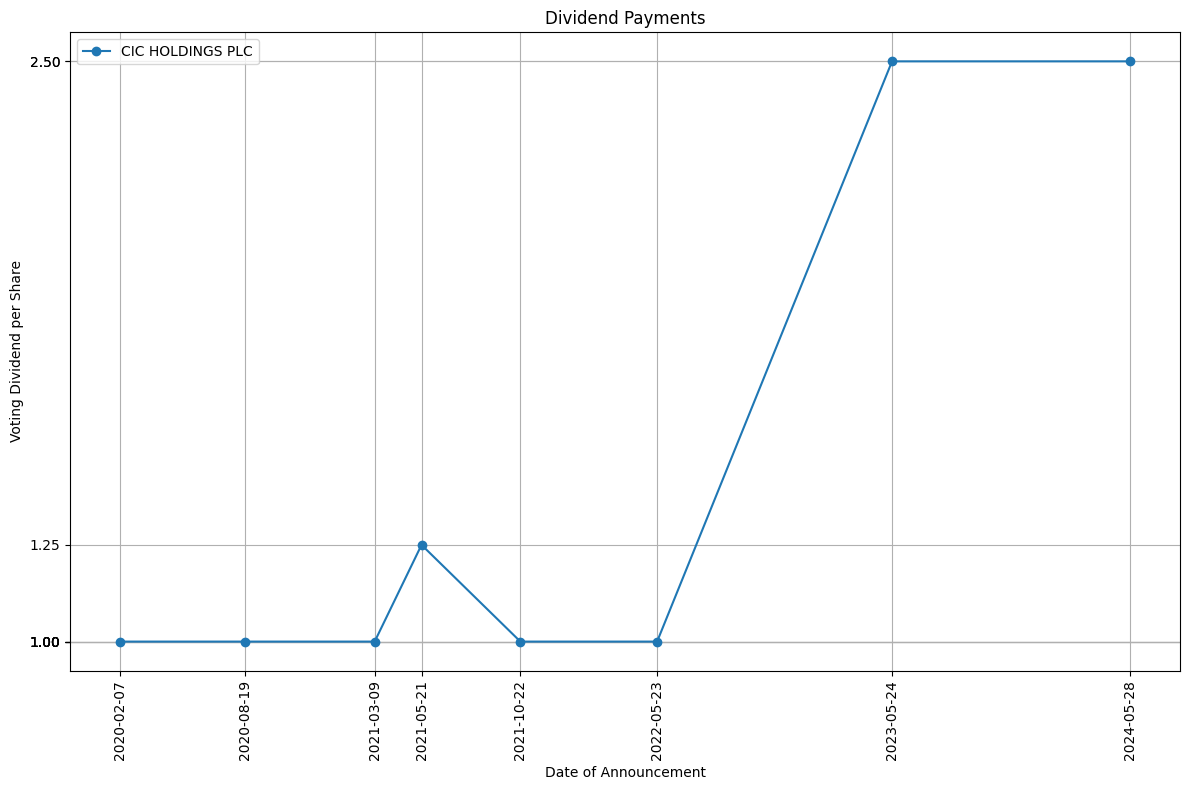

                      company date_of_announcement  voting_div_per_share  \
id                                                                         
1965   LAXAPANA BATTERIES PLC           2019-08-27                  0.25   
6715   LAXAPANA BATTERIES PLC           2020-10-05                  1.00   
9248   LAXAPANA BATTERIES PLC           2021-04-01                  1.00   
13780  LAXAPANA BATTERIES PLC           2022-02-22                  0.75   
16672  LAXAPANA BATTERIES PLC           2022-09-06                  1.00   
18716  LAXAPANA BATTERIES PLC           2023-03-07                  1.00   
23399  LAXAPANA BATTERIES PLC           2024-03-06                  1.50   
29706            LAXAPANA PLC           2025-02-20                  1.50   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
1965  2019-10-01                       NaN 2019-10-09   LITE  
6715  2020-11-12                       NaN 2020-12

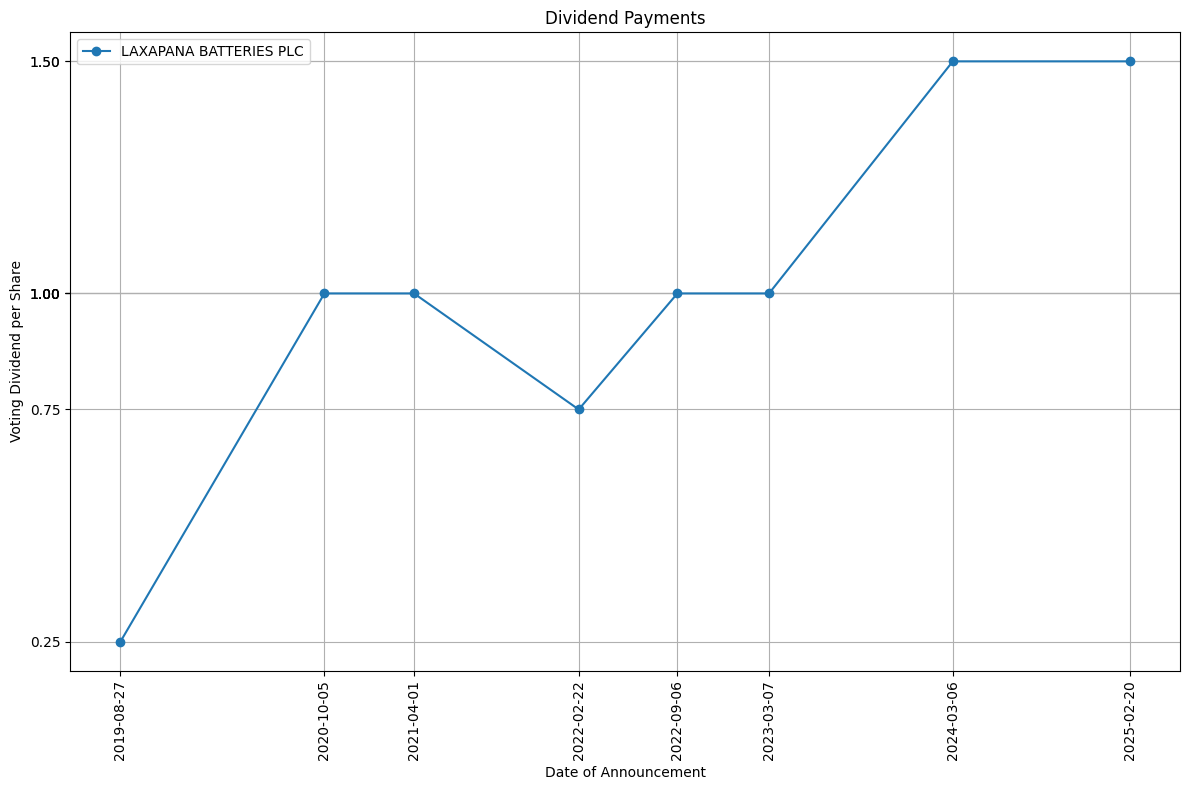

                      company date_of_announcement  voting_div_per_share  \
id                                                                         
2062   CARSON CUMBERBATCH PLC           2019-09-03                  0.75   
7617   CARSON CUMBERBATCH PLC           2020-12-10                  0.75   
11512  CARSON CUMBERBATCH PLC           2021-09-08                  1.50   
15559  CARSON CUMBERBATCH PLC           2022-06-27                  1.50   
20189  CARSON CUMBERBATCH PLC           2023-07-04                  2.10   
24213  CARSON CUMBERBATCH PLC           2024-05-14                  4.70   
26357  CARSON CUMBERBATCH PLC           2024-09-02                  3.84   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
2062  2019-09-12                       NaN 2019-09-23   CARS  
7617  2020-12-21                       NaN 2021-01-12   CARS  
11512 2021-09-17                       NaN 2021-10-08   CARS  


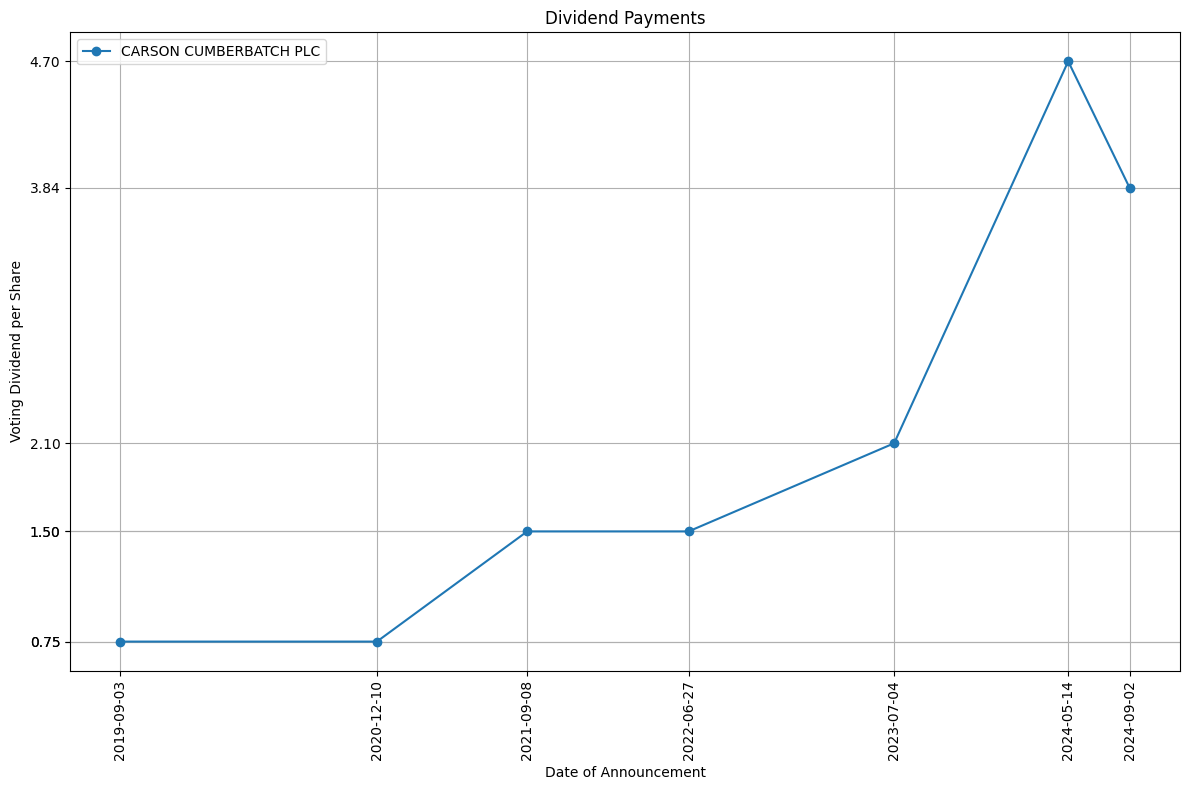

             company date_of_announcement  voting_div_per_share         xd  \
id                                                                           
15727  LANKA IOC PLC           2022-07-05                  2.25 2022-08-05   
15803  LANKA IOC PLC           2022-07-08                  2.25 2022-08-08   
16267  LANKA IOC PLC           2022-08-17                  2.25 2022-09-20   
19856  LANKA IOC PLC           2023-06-09                  4.00 2023-06-30   
20045  LANKA IOC PLC           2023-06-26                  4.00 2023-07-04   
24649  LANKA IOC PLC           2024-06-04                  5.00 2024-07-01   
24885  LANKA IOC PLC           2024-06-18                  5.00 2024-07-02   

       non_voting_div_per_share    payment symbol  
id                                                 
15727                       NaN 2022-08-26   LIOC  
15803                       NaN 2022-08-29   LIOC  
16267                       NaN 2022-10-11   LIOC  
19856                       NaN 2023-

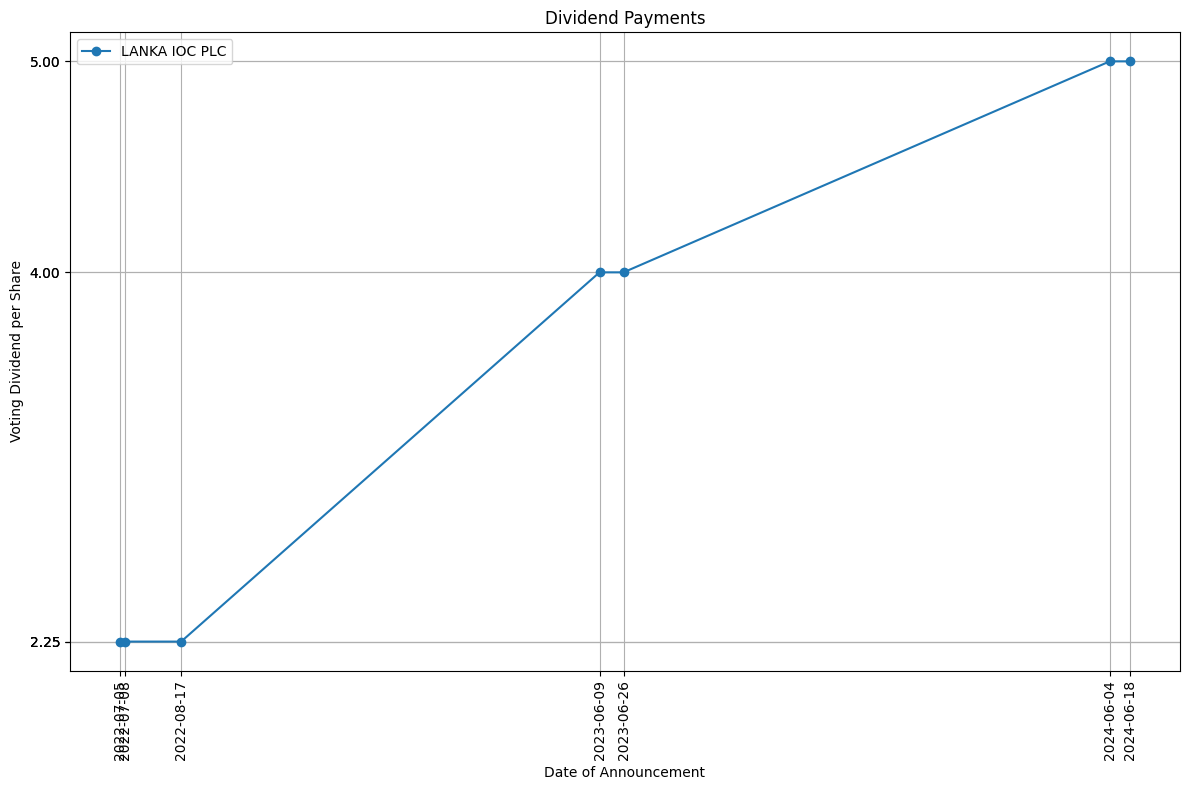

                 company date_of_announcement  voting_div_per_share  \
id                                                                    
4598   AITKEN SPENCE PLC           2020-05-22                  1.25   
9731   AITKEN SPENCE PLC           2021-05-21                  1.00   
14800  AITKEN SPENCE PLC           2022-05-12                  4.00   
19588  AITKEN SPENCE PLC           2023-05-29                  4.00   
19684  AITKEN SPENCE PLC           2023-06-05                  4.00   
25021  AITKEN SPENCE PLC           2024-06-26                  4.25   
25270  AITKEN SPENCE PLC           2024-07-03                  4.25   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
4598  2020-07-01                       NaN 2020-07-09   SPEN  
9731  2021-07-01                       NaN 2021-07-22   SPEN  
14800 2022-05-24                       NaN 2022-06-13   SPEN  
19588        NaT                       NaN 20

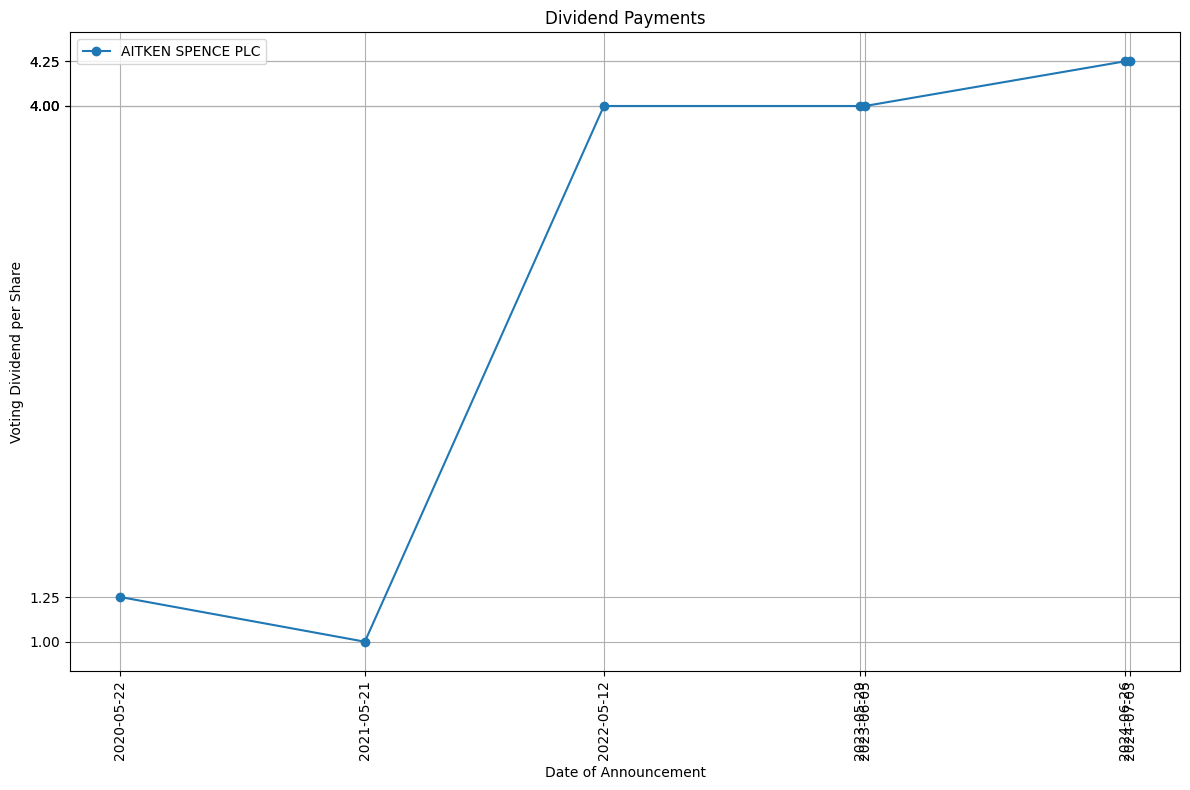

                company date_of_announcement  voting_div_per_share         xd  \
id                                                                              
1145   ACL PLASTICS PLC           2019-06-26                   6.0 2019-07-05   
5740   ACL PLASTICS PLC           2020-07-29                   6.0 2020-08-10   
12181  ACL PLASTICS PLC           2021-10-27                  10.0 2021-11-08   
16076  ACL PLASTICS PLC           2022-08-01                  15.0 2022-08-10   
20467  ACL PLASTICS PLC           2023-07-28                  15.0 2023-08-09   
25552  ACL PLASTICS PLC           2024-07-25                  20.0 2024-08-05   

       non_voting_div_per_share    payment symbol  
id                                                 
1145                        NaN 2019-07-17   APLA  
5740                        NaN 2020-08-28   APLA  
12181                       NaN 2021-11-29   APLA  
16076                       NaN 2022-08-31   APLA  
20467                       NaN 2023-08

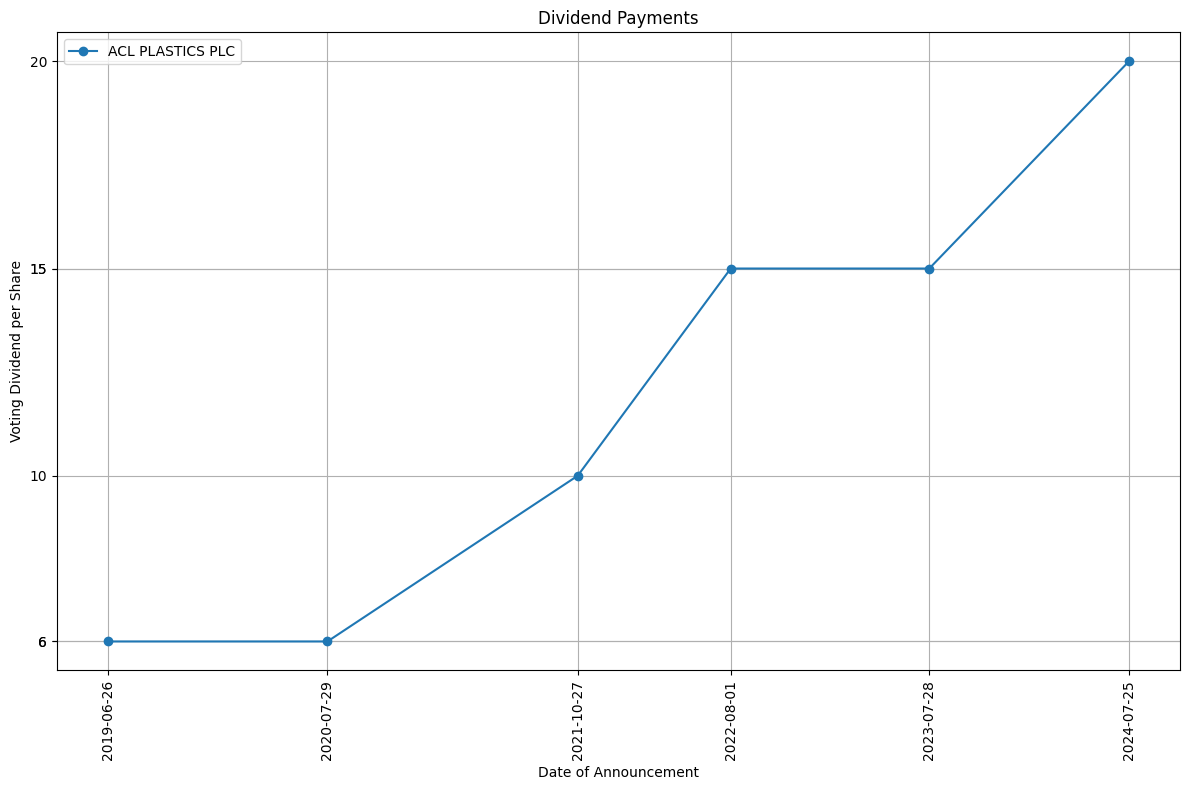

                     company date_of_announcement  voting_div_per_share  \
id                                                                        
1953   ABANS ELECTRICALS PLC           2019-08-26                   3.0   
6229   ABANS ELECTRICALS PLC           2020-08-31                   1.5   
11267  ABANS ELECTRICALS PLC           2021-08-30                   3.0   
16445  ABANS ELECTRICALS PLC           2022-08-30                   5.0   
20943  ABANS ELECTRICALS PLC           2023-08-31                   5.0   
26164  ABANS ELECTRICALS PLC           2024-08-29                  10.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
1953  2019-09-19                       NaN 2019-09-27   ABAN  
6229  2020-09-24                       NaN 2020-10-15   ABAN  
11267 2021-09-30                       NaN 2021-10-22   ABAN  
16445 2022-09-29                       NaN 2022-10-20   ABAN  
20943 2023-09-25     

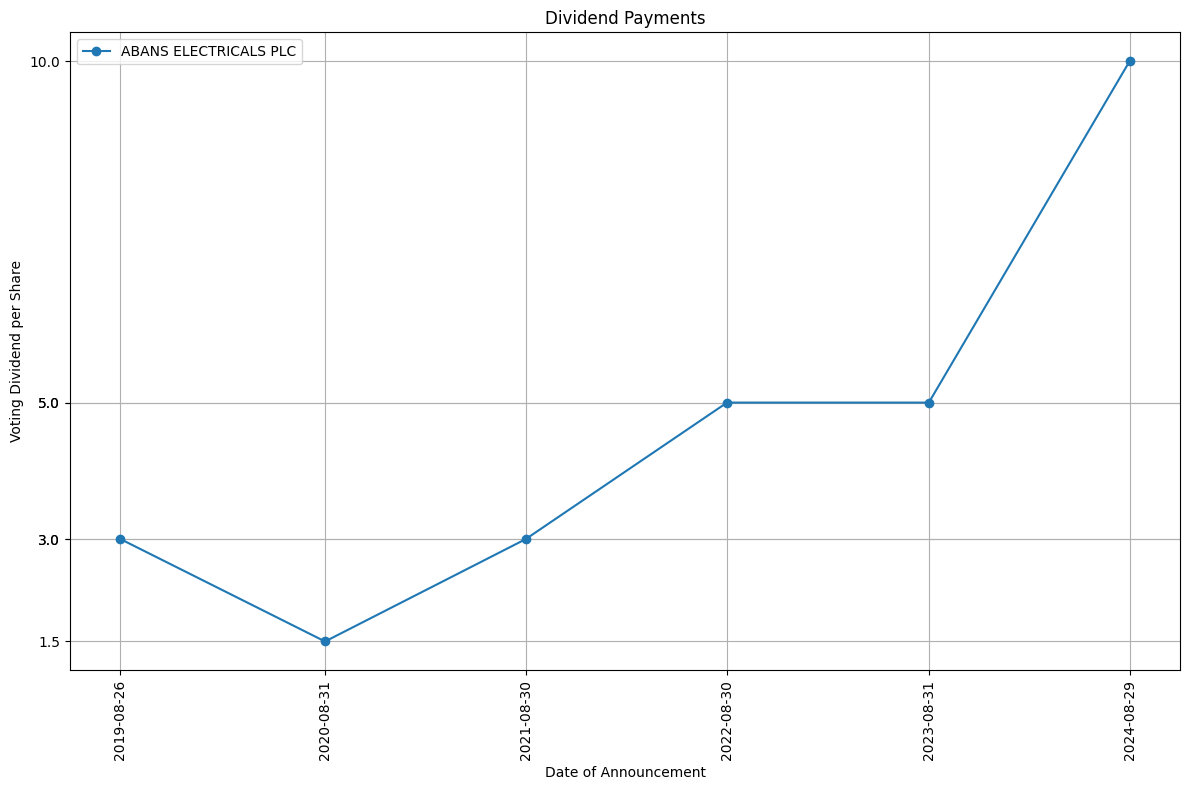

                             company date_of_announcement  \
id                                                          
2708   COMMERCIAL BANK OF CEYLON PLC           2019-10-25   
3558   COMMERCIAL BANK OF CEYLON PLC           2020-01-31   
8746   COMMERCIAL BANK OF CEYLON PLC           2021-02-25   
13846  COMMERCIAL BANK OF CEYLON PLC           2022-02-25   
23196  COMMERCIAL BANK OF CEYLON PLC           2024-02-21   
29838  COMMERCIAL BANK OF CEYLON PLC           2025-02-28   

       voting_div_per_share         xd  non_voting_div_per_share    payment  \
id                                                                            
2708                    1.5 2019-11-05                       1.5 2019-11-18   
3558                    3.0 2020-02-12                       3.0 2020-02-24   
8746                    4.5 2021-03-31                       4.5 2021-04-23   
13846                   4.5 2022-03-31                       4.5 2022-04-25   
23196                   4.5 2024-04-0

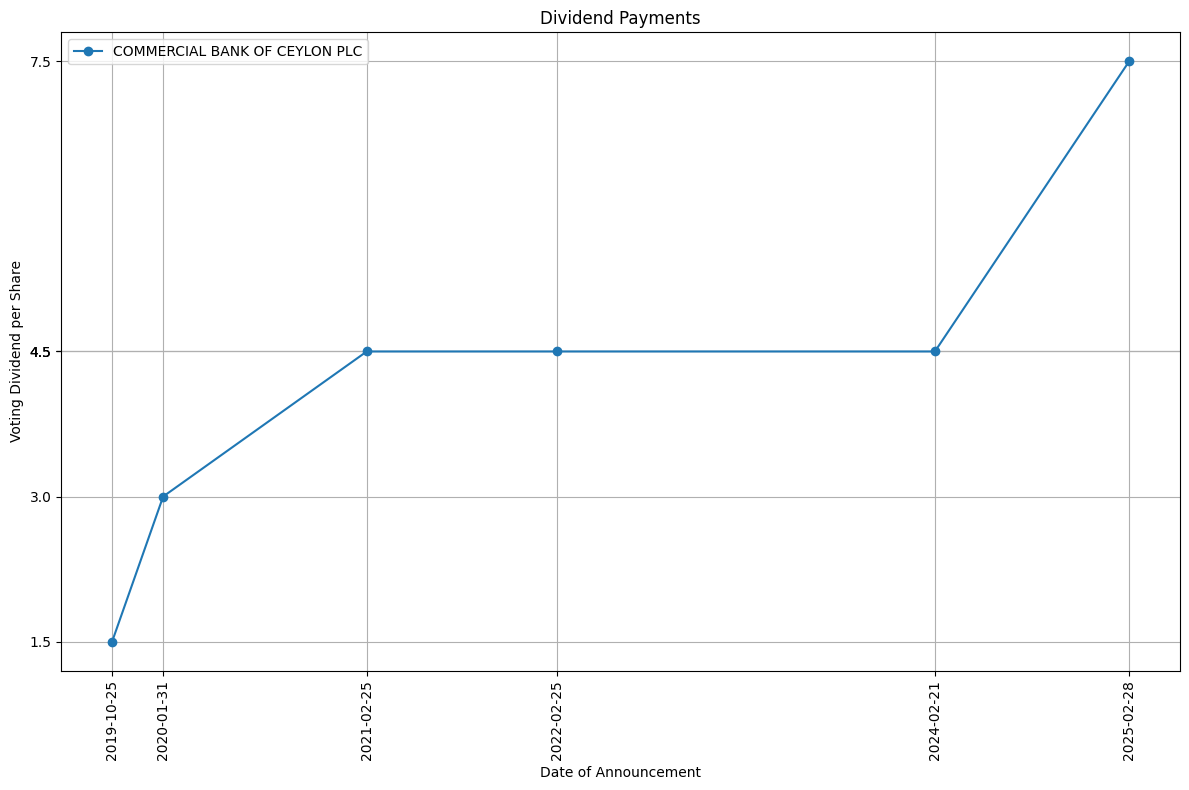

                           company date_of_announcement  voting_div_per_share  \
id                                                                              
1934   RAIGAM WAYAMBA SALTERNS PLC           2019-08-23                  0.05   
6094   RAIGAM WAYAMBA SALTERNS PLC           2020-08-20                  0.10   
11145  RAIGAM WAYAMBA SALTERNS PLC           2021-08-20                  0.10   
16401  RAIGAM WAYAMBA SALTERNS PLC           2022-08-26                  0.15   
20928  RAIGAM WAYAMBA SALTERNS PLC           2023-08-31                  0.20   
26129  RAIGAM WAYAMBA SALTERNS PLC           2024-08-28                  0.15   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
1934  2019-09-27                       NaN 2019-10-07   RWSL  
6094  2020-10-02                       0.0 2020-10-12   RWSL  
11145 2021-10-01                       0.0 2021-10-11   RWSL  
16401 2022-09-30                    

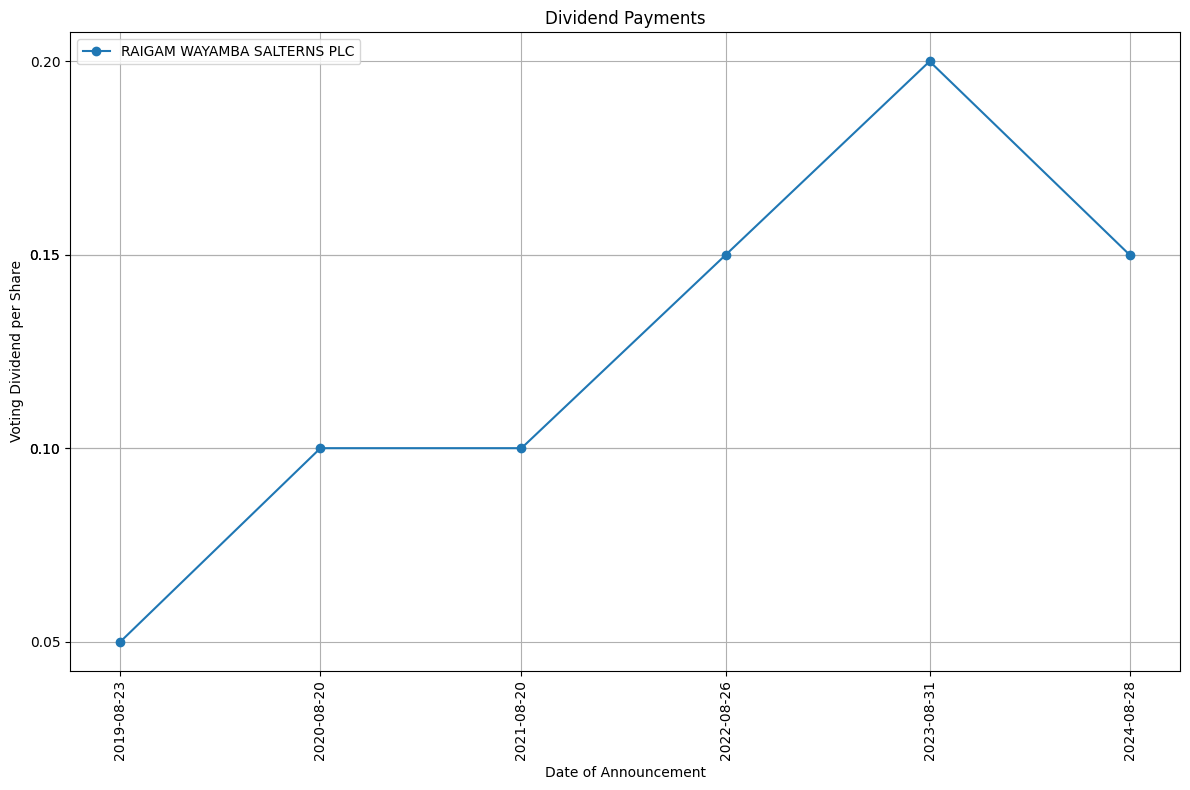

                 company date_of_announcement  voting_div_per_share  \
id                                                                    
1539   KELANI CABLES PLC           2019-07-24                   3.5   
5662   KELANI CABLES PLC           2020-07-23                   4.5   
10738  KELANI CABLES PLC           2021-07-26                   4.5   
16126  KELANI CABLES PLC           2022-08-04                   6.5   
20470  KELANI CABLES PLC           2023-07-28                   6.5   
25520  KELANI CABLES PLC           2024-07-23                  10.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
1539  2019-08-02                       NaN 2019-08-15   KCAB  
5662  2020-08-04                       NaN 2020-08-24   KCAB  
10738 2021-08-04                       NaN 2021-08-24   KCAB  
16126 2022-08-16                       NaN 2022-09-05   KCAB  
20470 2023-08-09                       NaN 2023-08-29

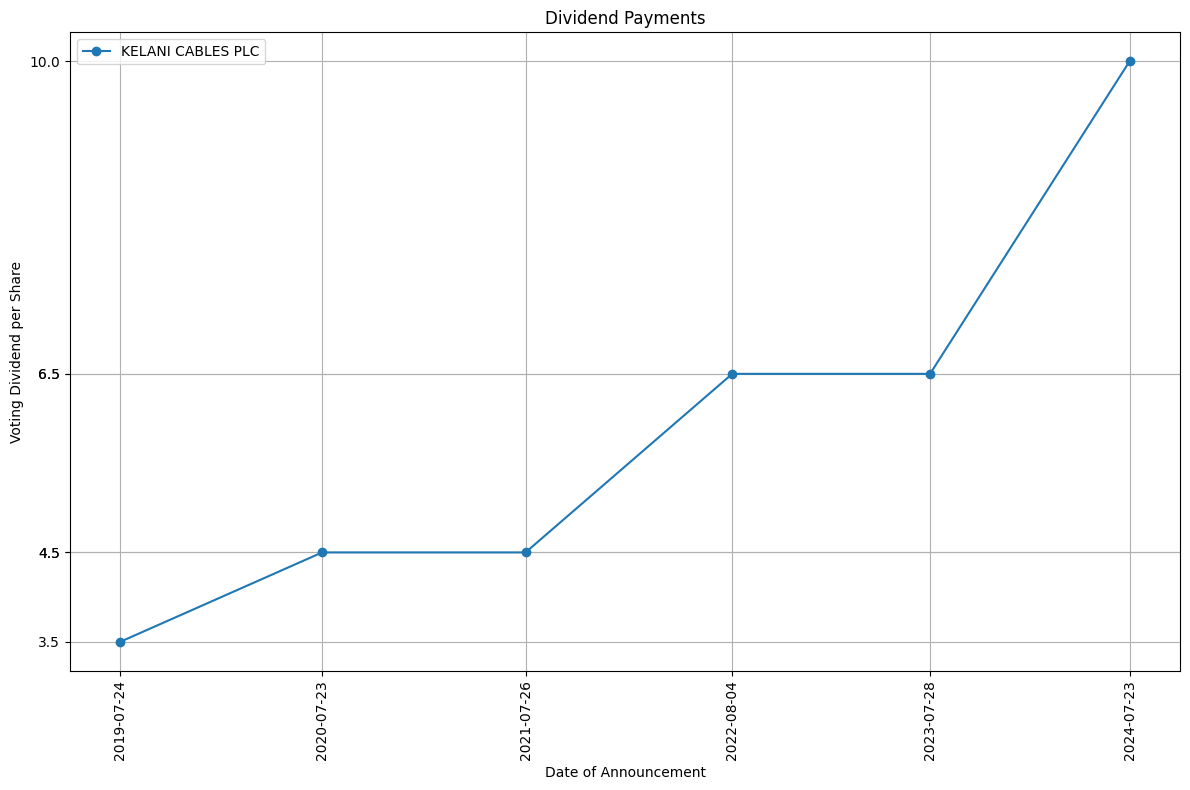

                  company date_of_announcement  voting_div_per_share  \
id                                                                     
2256   PANASIAN POWER PLC           2019-09-17                  0.12   
5629   PANASIAN POWER PLC           2020-07-21                  0.10   
8453   PANASIAN POWER PLC           2021-02-05                  0.12   
10346  PANASIAN POWER PLC           2021-06-30                  0.14   
14084  PANASIAN POWER PLC           2022-03-16                  0.20   
23547  PANASIAN POWER PLC           2024-03-21                  0.20   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
2256  2019-09-26                       NaN 2019-10-07    PAP  
5629  2020-07-30                       NaN 2020-08-11    PAP  
8453  2021-02-16                       NaN 2021-03-09    PAP  
10346 2021-07-09                       NaN 2021-08-02    PAP  
14084 2022-03-28                       NaN 20

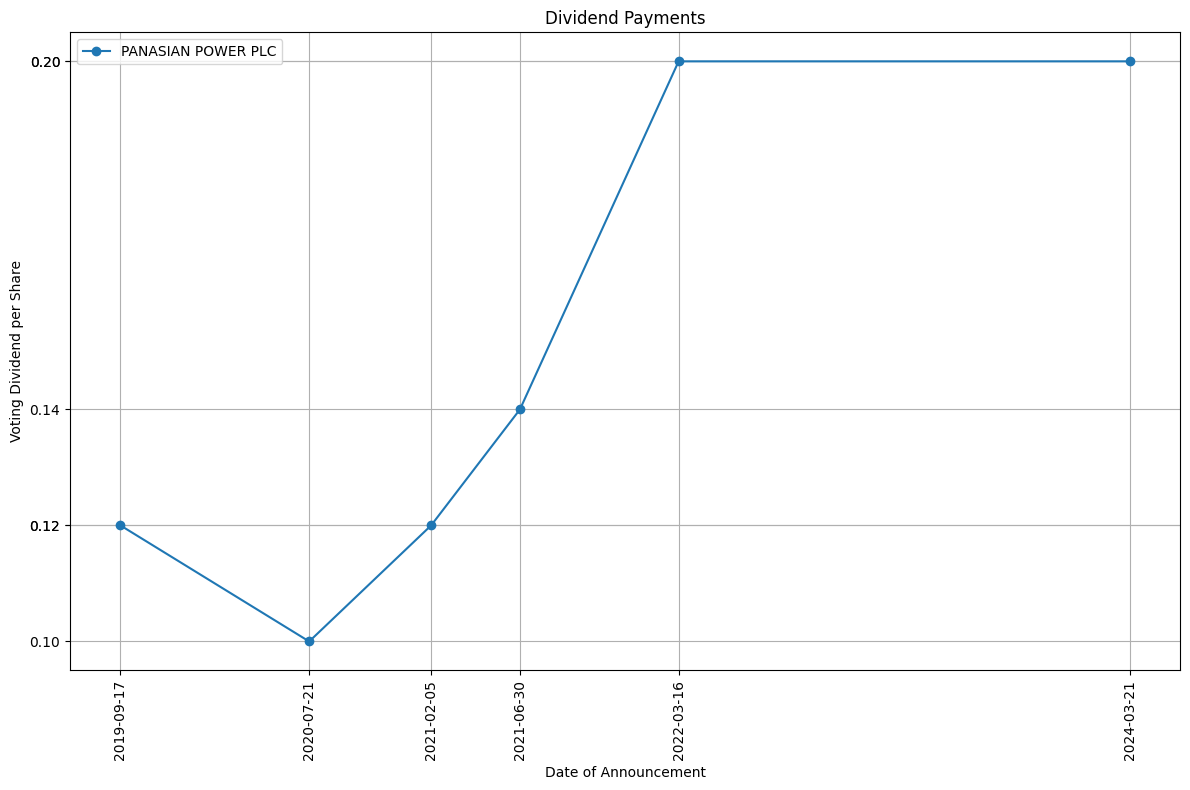

                         company date_of_announcement  voting_div_per_share  \
id                                                                            
10041  JANASHAKTHI INSURANCE PLC           2021-06-10                  2.00   
14378  JANASHAKTHI INSURANCE PLC           2022-04-06                  2.30   
19539  JANASHAKTHI INSURANCE PLC           2023-05-25                  2.65   
24028  JANASHAKTHI INSURANCE PLC           2024-04-29                 13.24   
24033  JANASHAKTHI INSURANCE PLC           2024-04-30                 13.24   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
10041 2021-07-06                       NaN 2021-07-28   JINS  
14378 2022-05-04                       NaN 2022-05-25   JINS  
19539 2023-06-01                       0.0 2023-06-21   JINS  
24028 2024-05-20                       NaN 2024-06-11   JINS  
24033 2024-05-20                       NaN 2024-06-11   JINS  


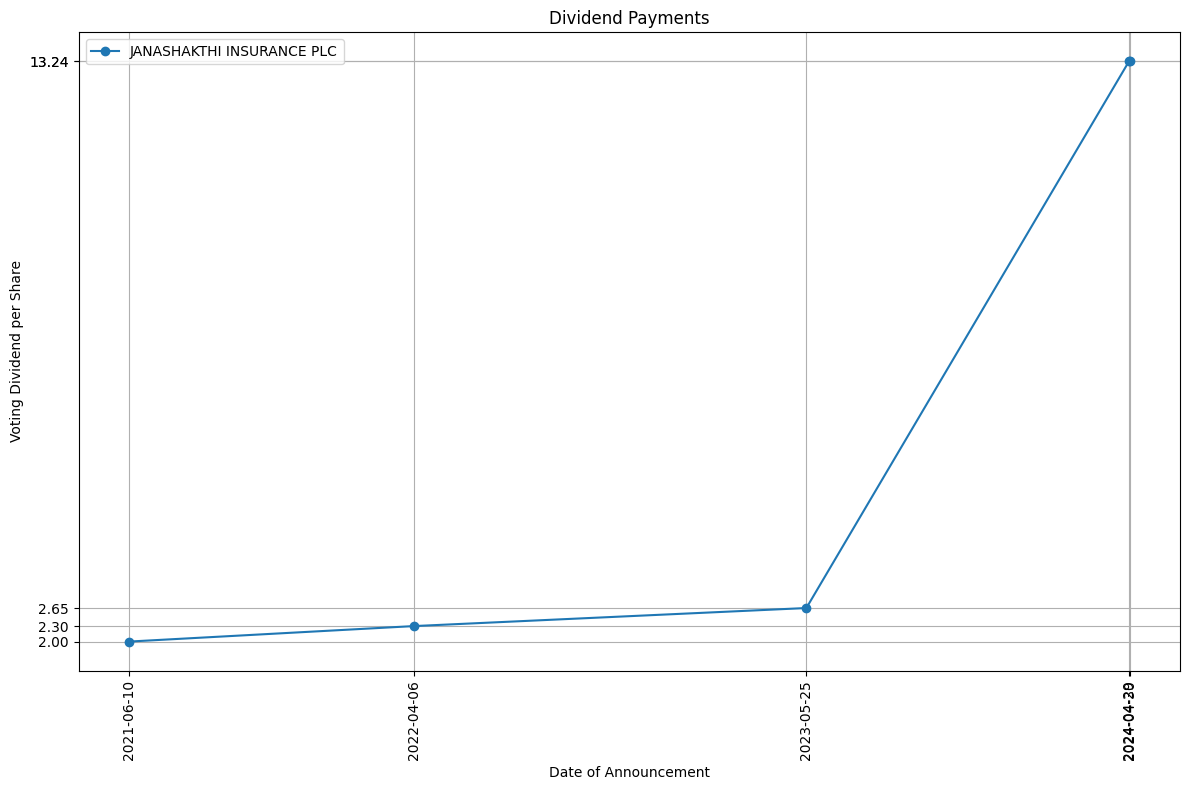

                      company date_of_announcement  voting_div_per_share  \
id                                                                         
3856   CEYLINCO INSURANCE PLC           2020-03-02                  38.0   
9490   CEYLINCO INSURANCE PLC           2021-04-27                  40.0   
14333  CEYLINCO INSURANCE PLC           2022-04-04                  42.0   
19053  CEYLINCO INSURANCE PLC           2023-04-03                  45.0   
23538  CEYLINCO INSURANCE PLC           2024-03-21                  48.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
3856  2020-04-15                      38.0 2020-04-23   CINS  
9490  2021-05-06                      40.0 2021-05-18   CINS  
14333 2022-05-23                      42.0 2022-06-10   CINS  
19053 2023-05-29                      45.0 2023-06-14   CINS  
23538 2024-05-22                      48.0 2024-05-31   CINS  


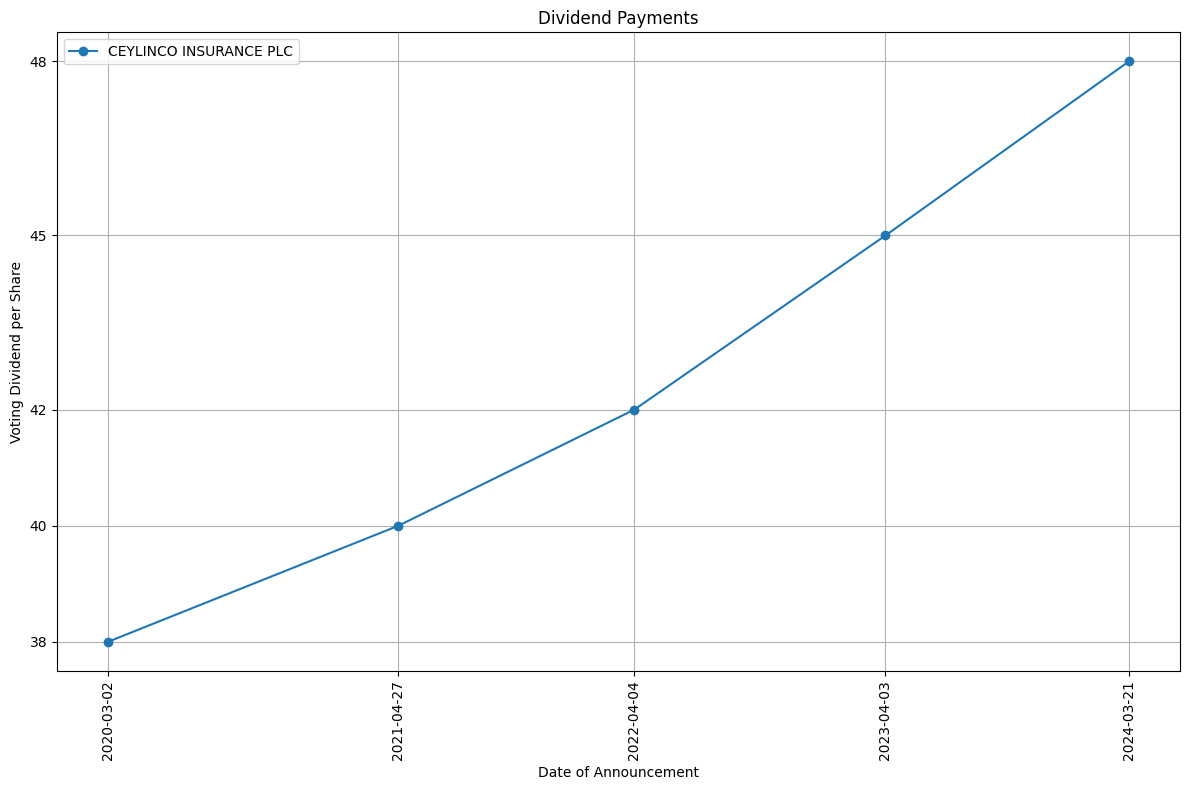

                           company date_of_announcement  voting_div_per_share  \
id                                                                              
6411   ASIRI HOSPITAL HOLDINGS PLC           2020-09-11                   0.8   
8997   ASIRI HOSPITAL HOLDINGS PLC           2021-03-17                   0.8   
12290  ASIRI HOSPITAL HOLDINGS PLC           2021-11-05                   1.3   
14192  ASIRI HOSPITAL HOLDINGS PLC           2022-03-25                   1.2   
26619  ASIRI HOSPITAL HOLDINGS PLC           2024-09-13                   1.5   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
6411  2020-09-22                       NaN 2020-10-12   ASIR  
8997  2021-03-26                       NaN 2021-04-16   ASIR  
12290 2021-11-16                       NaN 2021-12-07   ASIR  
14192 2022-04-05                       NaN 2022-04-28   ASIR  
26619 2024-09-26                       NaN 2024-10-15 

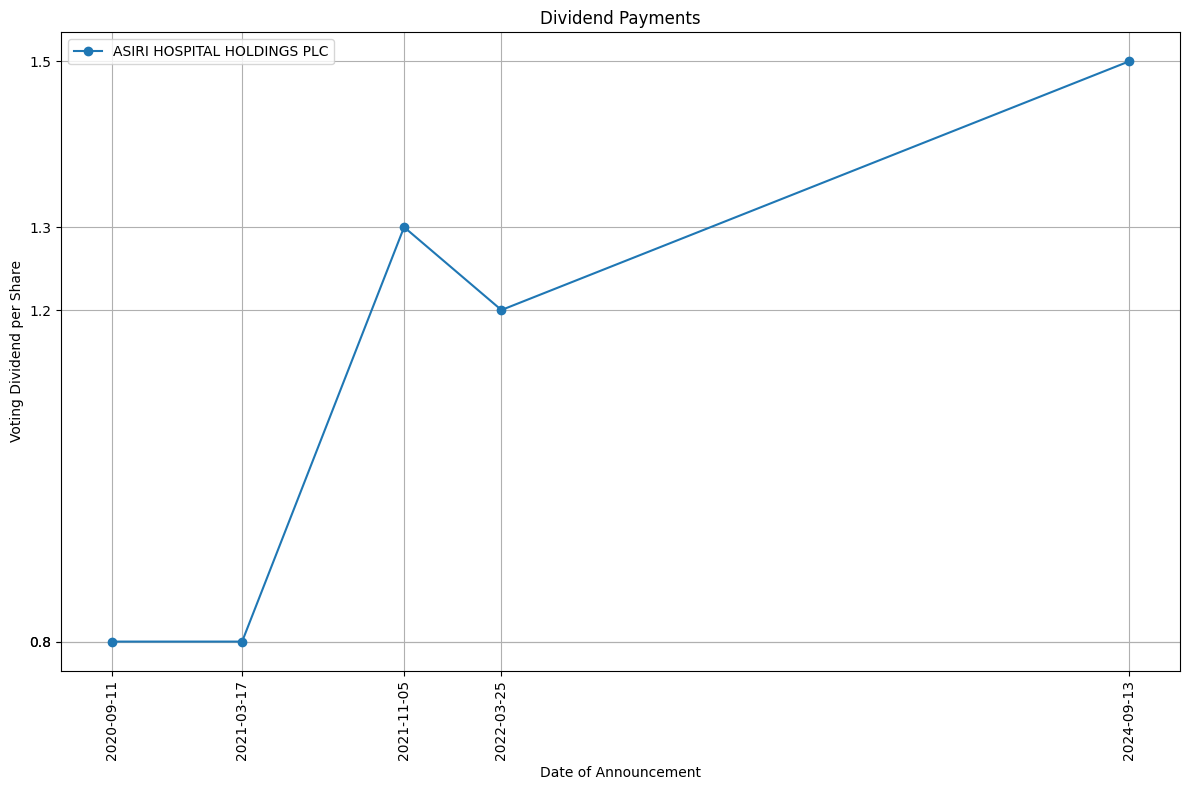

                            company date_of_announcement  \
id                                                         
8965   SOFTLOGIC LIFE INSURANCE PLC           2021-03-15   
13883  SOFTLOGIC LIFE INSURANCE PLC           2022-03-02   
18676  SOFTLOGIC LIFE INSURANCE PLC           2023-03-03   
23331  SOFTLOGIC LIFE INSURANCE PLC           2024-03-04   
27978  SOFTLOGIC LIFE INSURANCE PLC           2024-11-26   

       voting_div_per_share         xd  non_voting_div_per_share    payment  \
id                                                                            
8965                   2.50 2021-03-24                       NaN 2021-04-05   
13883                  2.80 2022-03-11                       NaN 2022-03-29   
18676                  3.50 2023-03-15                       NaN 2023-04-04   
23331                  3.75 2024-03-14                       NaN 2024-04-04   
27978                  4.50 2024-12-05                       NaN 2024-12-24   

      symbol  
id        

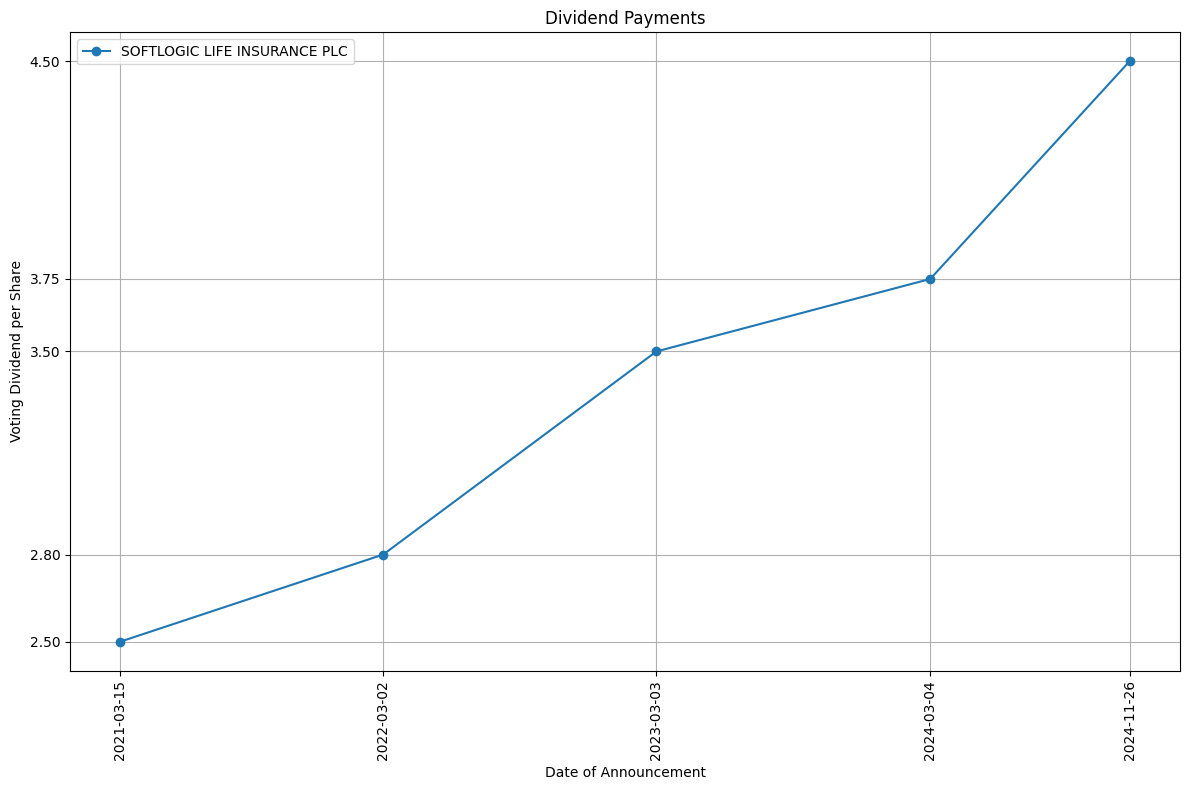

                                        company date_of_announcement  \
id                                                                     
1919   AITKEN SPENCE PLANTATION MANAGEMENTS PLC           2019-08-22   
3967   AITKEN SPENCE PLANTATION MANAGEMENTS PLC           2020-03-11   
6065   AITKEN SPENCE PLANTATION MANAGEMENTS PLC           2020-08-18   
11167  AITKEN SPENCE PLANTATION MANAGEMENTS PLC           2021-08-23   
14897  AITKEN SPENCE PLANTATION MANAGEMENTS PLC           2022-05-23   

       voting_div_per_share         xd  non_voting_div_per_share    payment  \
id                                                                            
1919                    2.0 2019-09-20                       NaN 2019-09-30   
3967                    3.0 2020-03-20                       NaN 2020-03-30   
6065                    2.0 2020-09-21                       NaN 2020-10-09   
11167                   8.0 2021-09-27                       NaN 2021-10-15   
14897                

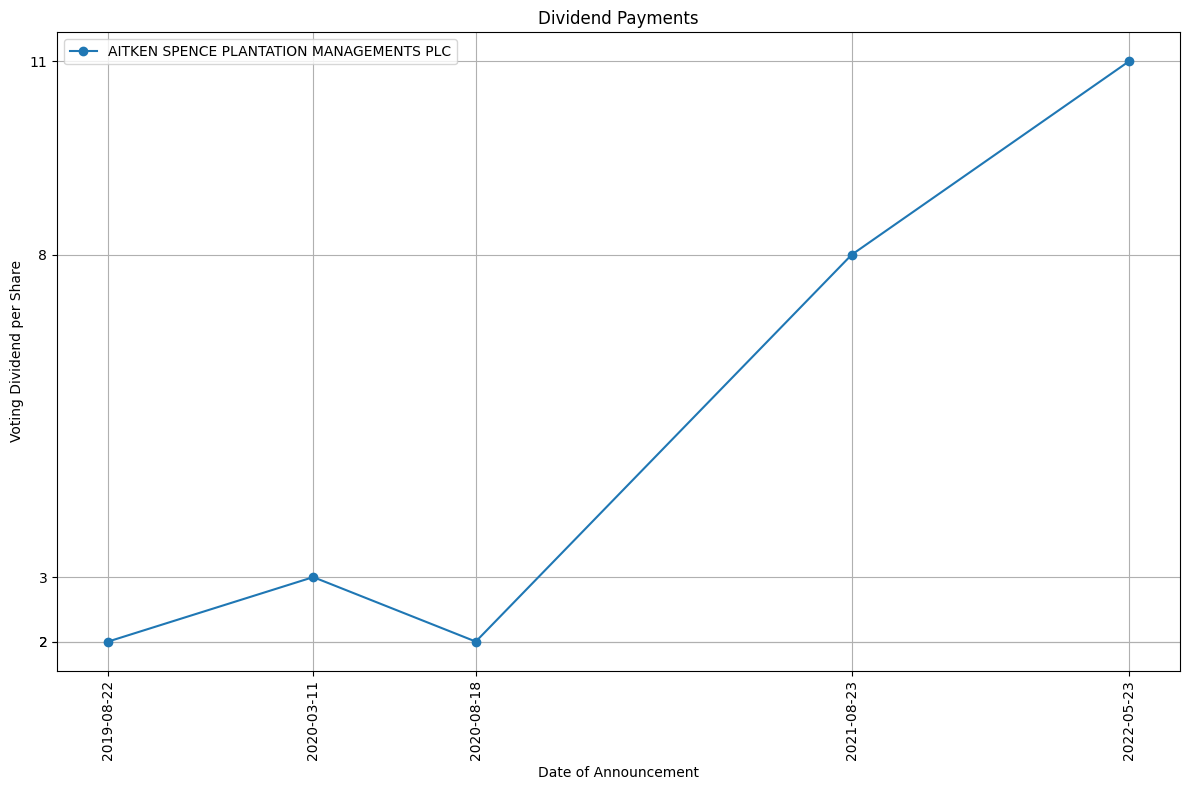

                          company date_of_announcement  voting_div_per_share  \
id                                                                             
9111   NAMUNUKULA PLANTATIONS PLC           2021-03-25                   8.5   
14195  NAMUNUKULA PLANTATIONS PLC           2022-03-25                  10.0   
18162  NAMUNUKULA PLANTATIONS PLC           2023-01-09                  14.0   
23393  NAMUNUKULA PLANTATIONS PLC           2024-03-05                  13.0   
29731  NAMUNUKULA PLANTATIONS PLC           2025-02-21                  15.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
9111  2021-04-06                       NaN 2021-04-28   NAMU  
14195 2022-04-05                       NaN 2022-04-27   NAMU  
18162 2023-01-19                       NaN 2023-02-08   NAMU  
23393 2024-03-15                       NaN 2024-04-04   NAMU  
29731 2025-03-05                       0.0 2025-03-25   NAMU 

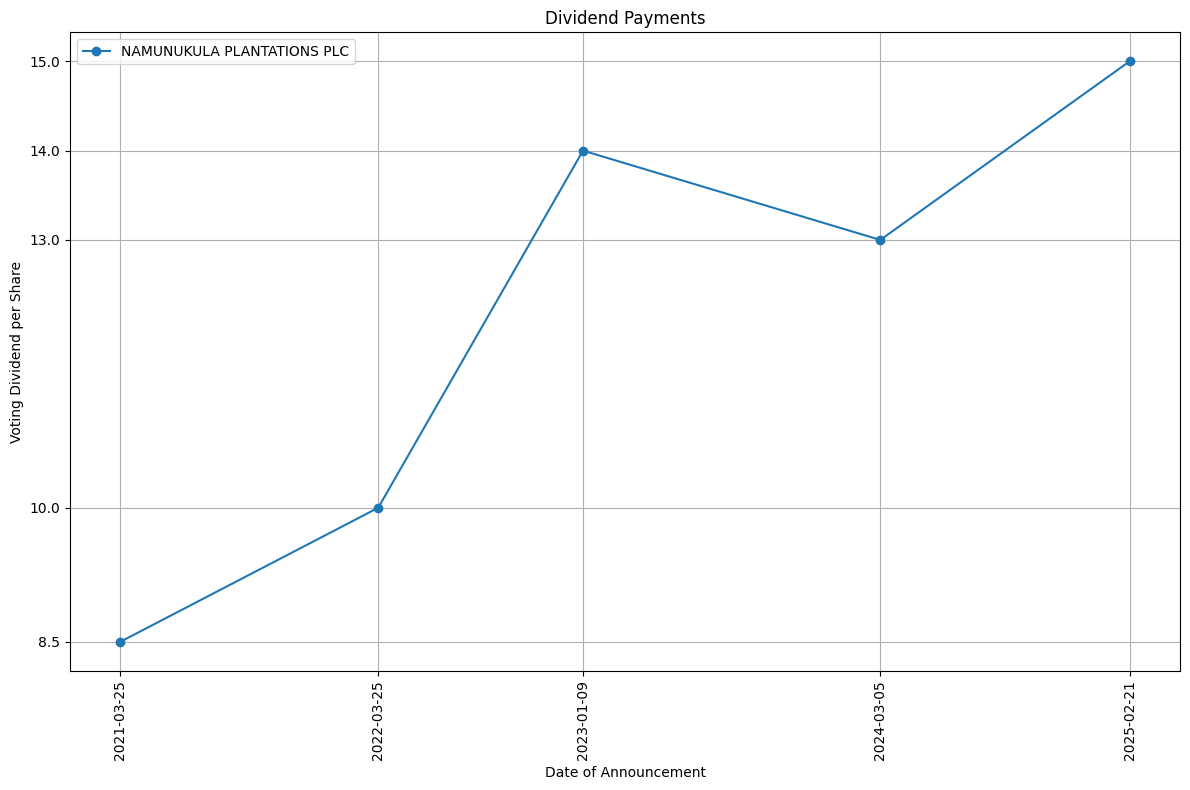

             company date_of_announcement  voting_div_per_share         xd  \
id                                                                           
3715   DFCC BANK PLC           2020-02-19                   2.5 2020-03-31   
4675   DFCC BANK PLC           2020-05-27                   2.5 2020-06-25   
23156  DFCC BANK PLC           2024-02-19                   3.0 2024-02-29   
29700  DFCC BANK PLC           2025-02-19                   4.0 2025-03-03   

       non_voting_div_per_share    payment symbol  
id                                                 
3715                        NaN 2020-04-09   DFCC  
4675                        NaN 2020-07-03   DFCC  
23156                       NaN 2024-03-21   DFCC  
29700                       0.0 2025-03-21   DFCC  


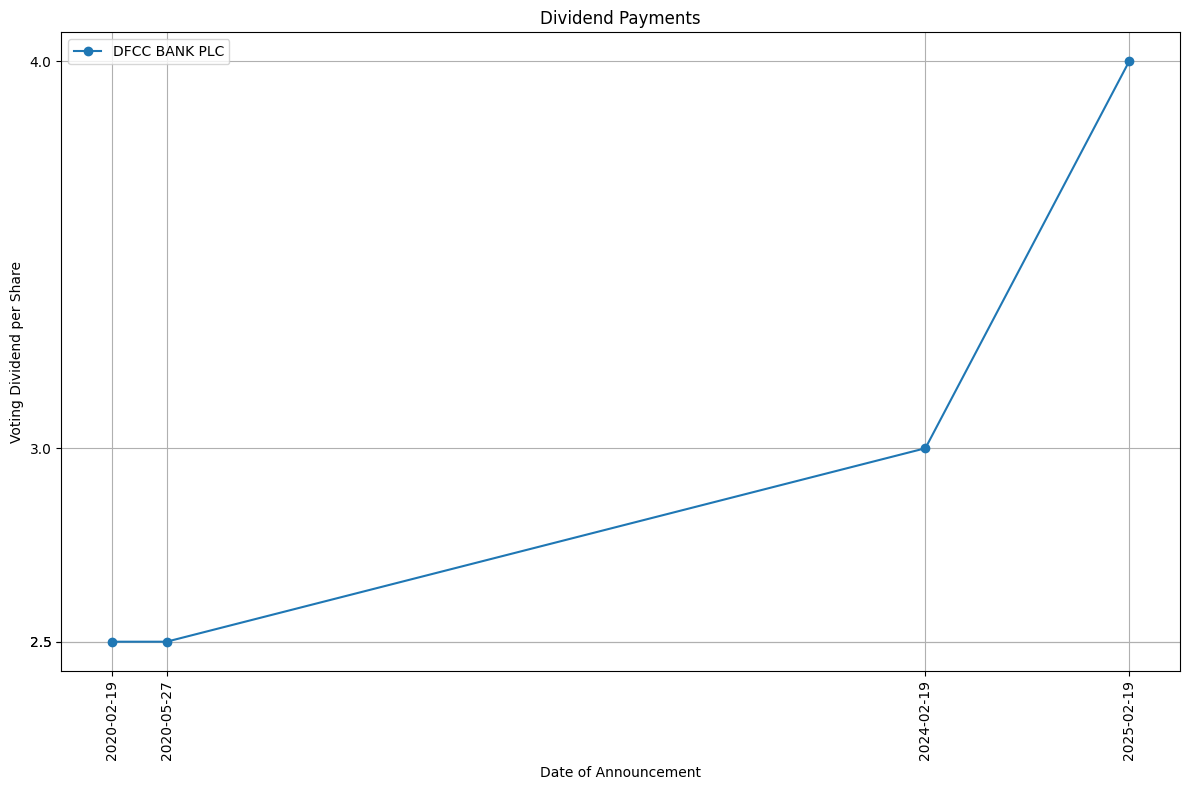

                      company date_of_announcement  voting_div_per_share  \
id                                                                         
5116   CENTRAL INDUSTRIES PLC           2020-06-22                   2.0   
9804   CENTRAL INDUSTRIES PLC           2021-05-31                   2.0   
19547  CENTRAL INDUSTRIES PLC           2023-05-25                   3.0   
24289  CENTRAL INDUSTRIES PLC           2024-05-21                   6.0   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
5116  2020-08-04                       NaN 2020-08-24   CIND  
9804  2021-07-20                       NaN 2021-08-11   CIND  
19547 2023-06-30                       NaN 2023-07-21   CIND  
24289 2024-06-28                       NaN 2024-07-17   CIND  


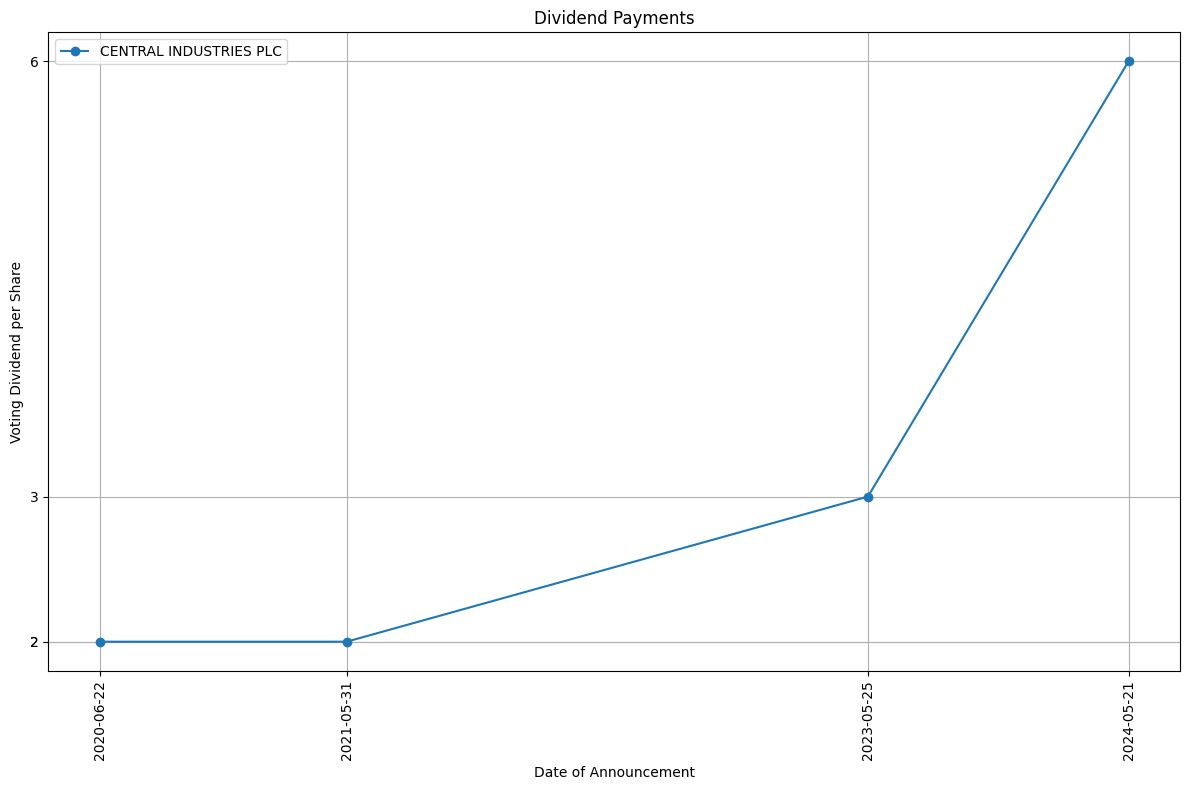

                 company date_of_announcement  voting_div_per_share  \
id                                                                    
9928   WINDFORCE LIMITED           2021-06-03                  0.75   
12702      WINDFORCE PLC           2021-12-06                  0.55   
23052      WINDFORCE PLC           2024-02-08                  1.00   
29617      WINDFORCE PLC           2025-02-14                  1.00   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
9928  2021-06-14                       NaN 2021-07-05   WIND  
12702 2021-12-15                       NaN 2022-01-04   WIND  
23052 2024-02-19                       NaN 2024-03-12   WIND  
29617 2025-02-25                       0.0 2025-03-18   WIND  


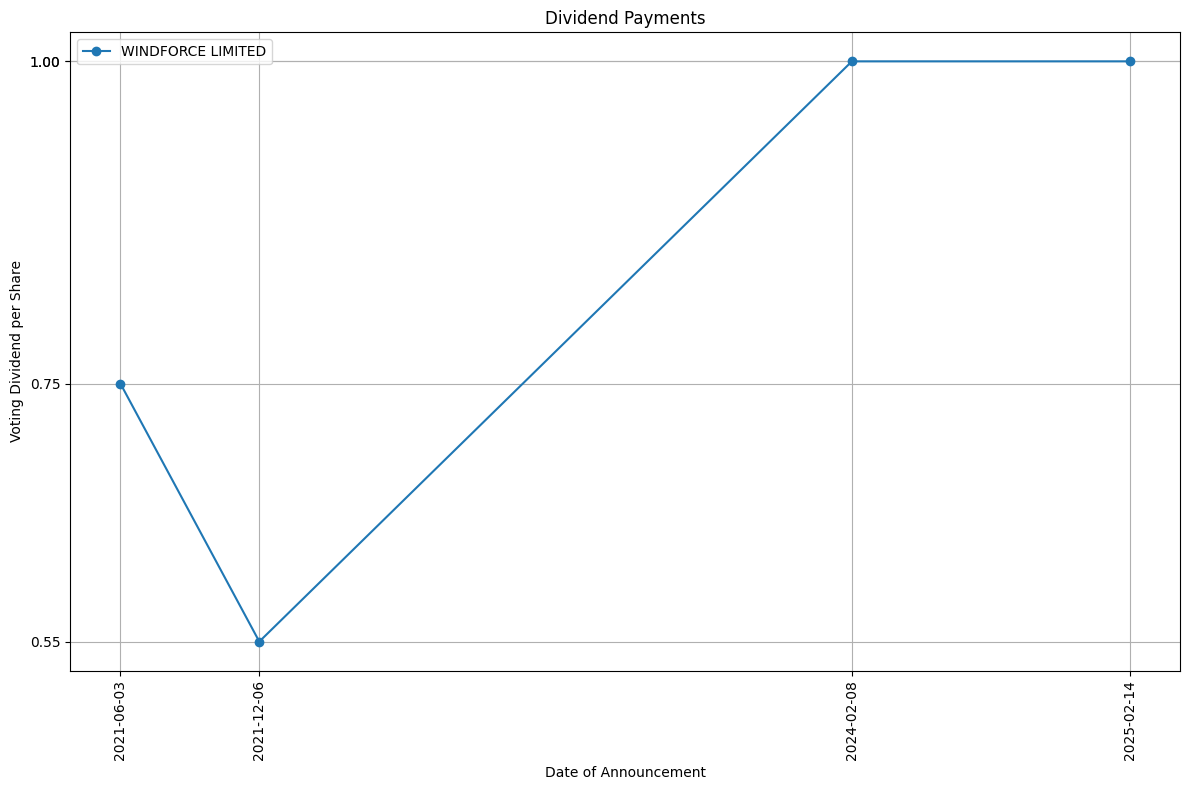

                   company date_of_announcement  voting_div_per_share  \
id                                                                      
4475   LVL ENERGY FUND PLC           2020-05-15                  0.18   
6762   LVL ENERGY FUND PLC           2020-10-07                  0.17   
11157  LVL ENERGY FUND PLC           2021-08-20                  0.35   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
4475  2020-05-27                       NaN 2020-06-04   LVEF  
6762  2020-11-20                       NaN 2020-12-10   LVEF  
11157 2021-09-27                       NaN 2021-10-15   LVEF  


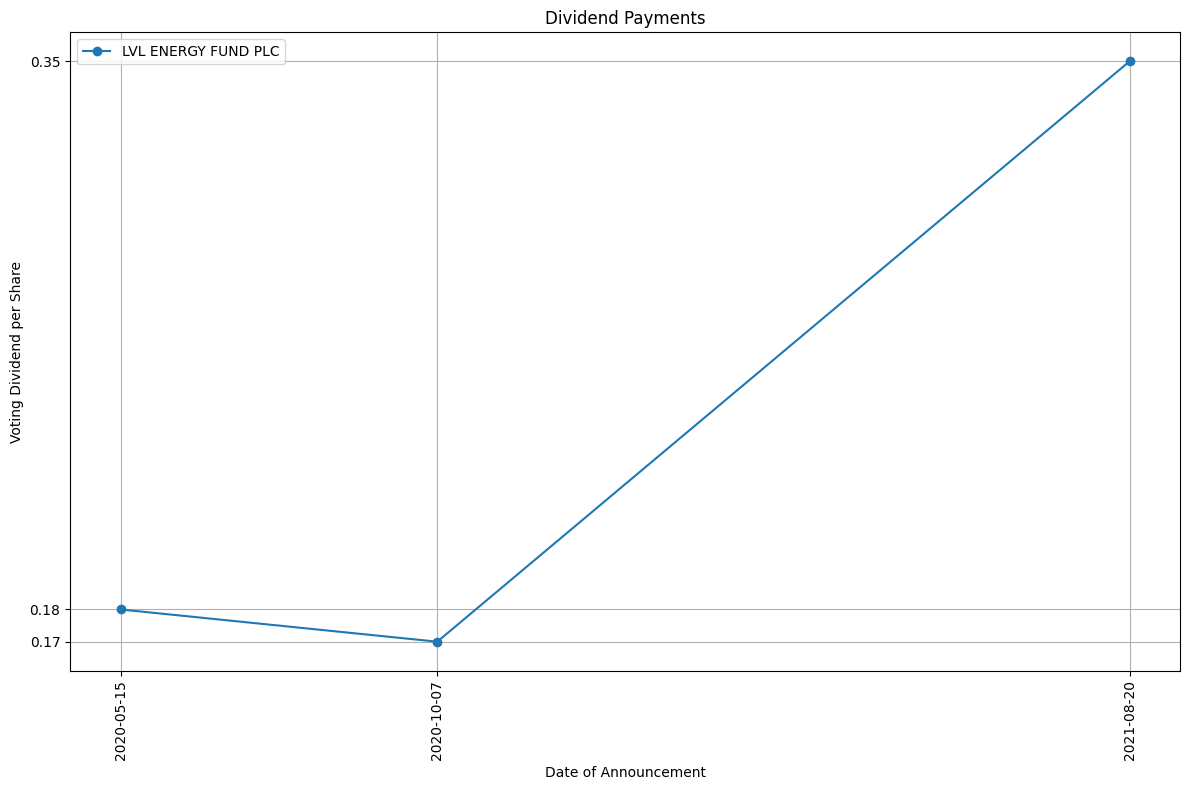

                 company date_of_announcement  voting_div_per_share  \
id                                                                    
16025  EXTERMINATORS PLC           2022-07-28                  0.07   
17643  EXTERMINATORS PLC           2022-11-22                  0.20   
19324  EXTERMINATORS PLC           2023-05-08                  0.40   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
16025 2022-08-31                       NaN 2022-09-20    EXT  
17643 2022-12-01                       NaN 2022-12-22    EXT  
19324 2023-05-17                       NaN 2023-05-24    EXT  


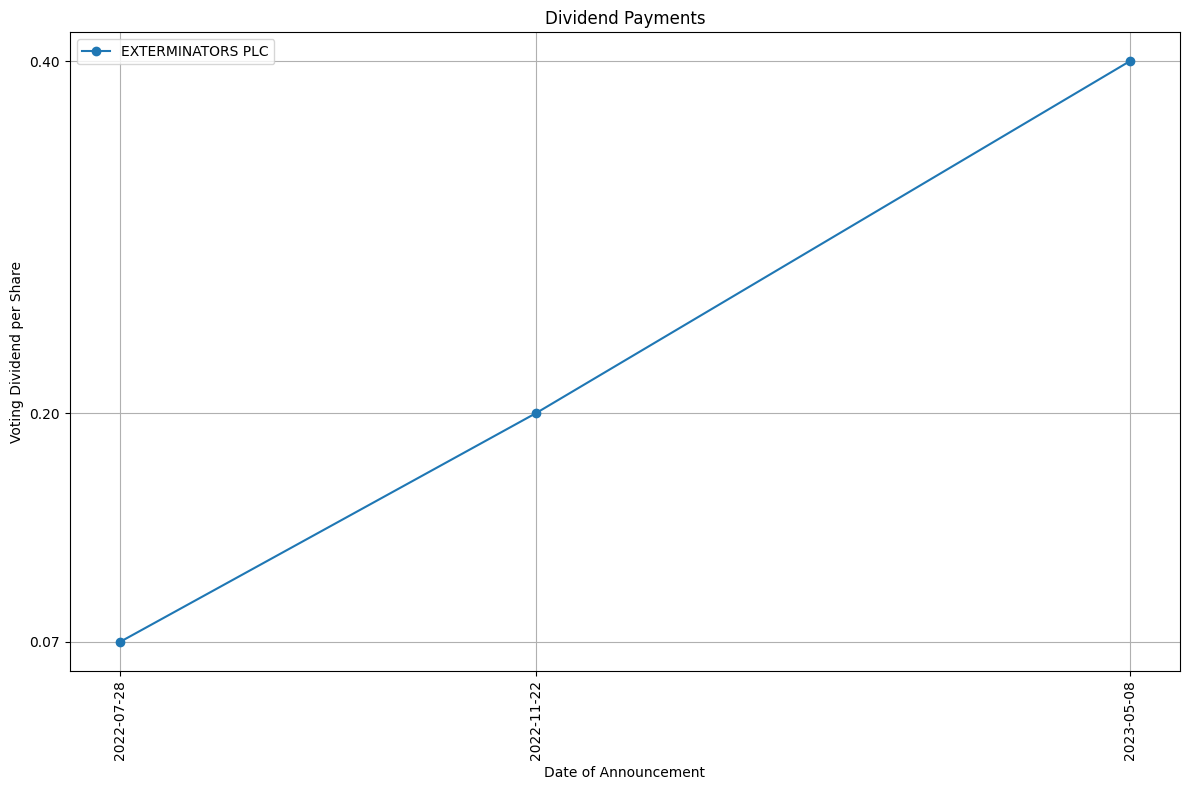

                             company date_of_announcement  \
id                                                          
16022  HSENID BUSINESS SOLUTIONS PLC           2022-07-28   
20116  HSENID BUSINESS SOLUTIONS PLC           2023-06-28   
25531  HSENID BUSINESS SOLUTIONS PLC           2024-07-24   

       voting_div_per_share         xd  non_voting_div_per_share    payment  \
id                                                                            
16022                  0.30 2022-08-26                       NaN 2022-09-15   
20116                  0.35 2023-08-18                       NaN 2023-09-08   
25531                  1.25 2024-08-16                       NaN 2024-09-05   

      symbol  
id            
16022    HBS  
20116    HBS  
25531    HBS  


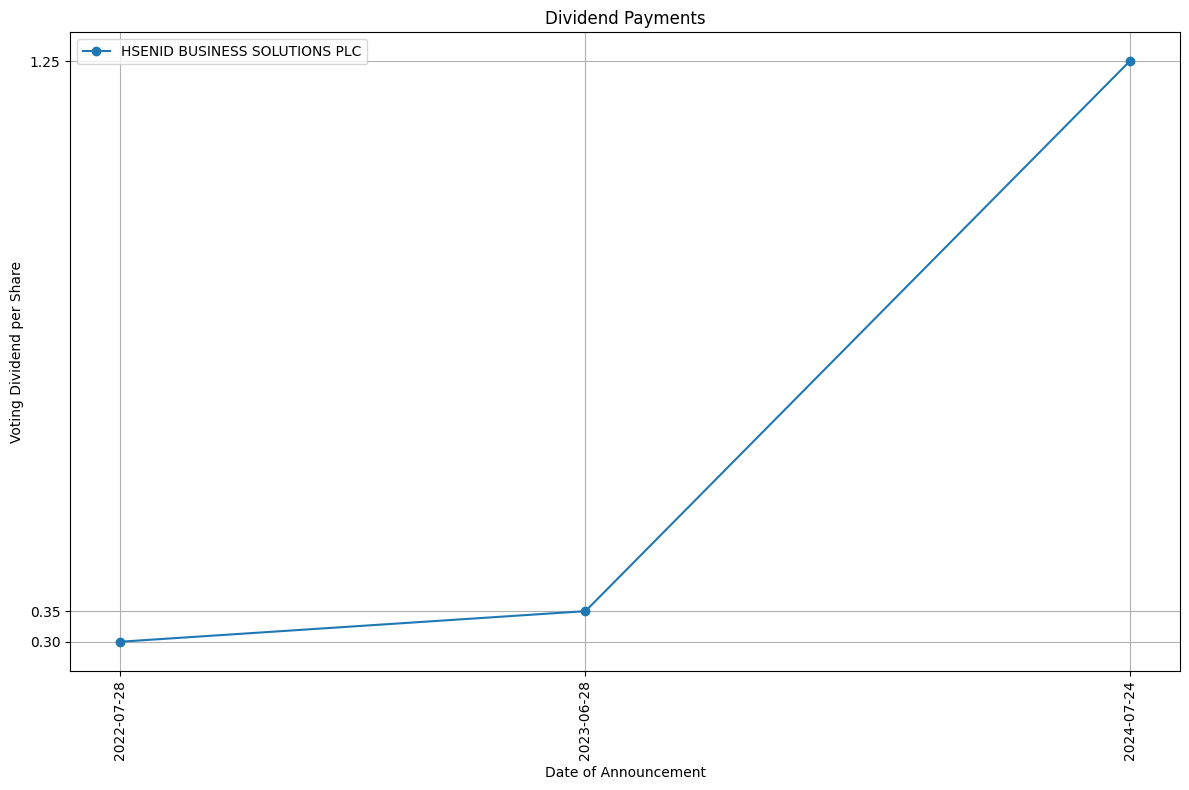

                     company date_of_announcement  voting_div_per_share  \
id                                                                        
1469   RENUKA AGRI FOODS PLC           2019-07-19                  0.12   
5933   RENUKA AGRI FOODS PLC           2020-08-12                  0.12   
16182  RENUKA AGRI FOODS PLC           2022-08-10                  0.20   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
1469  2019-09-19                       NaN 2019-09-26    RAL  
5933  2020-09-29                       NaN 2020-10-20    RAL  
16182 2022-09-08                       NaN 2022-09-27    RAL  


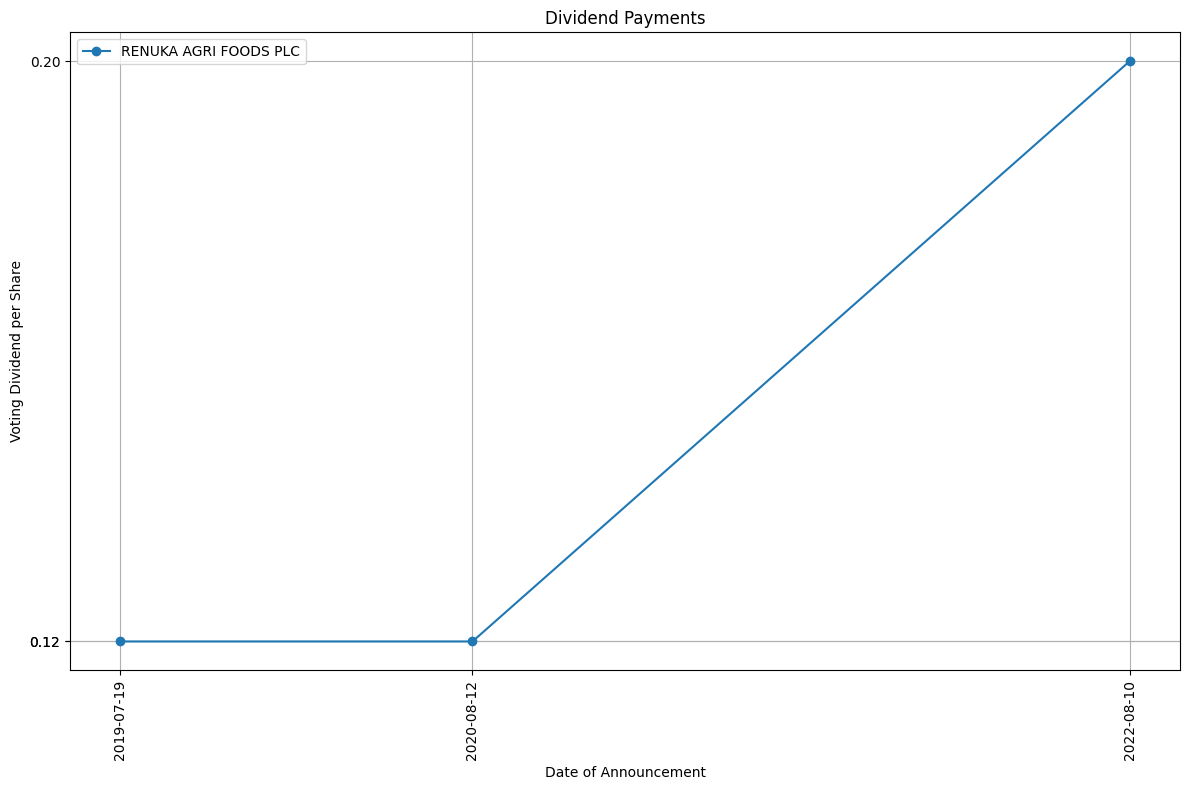

                 company date_of_announcement  voting_div_per_share  \
id                                                                    
16167  RENUKA HOTELS PLC           2022-08-09                  0.50   
20909  RENUKA HOTELS PLC           2023-08-29                  0.50   
26167  RENUKA HOTELS PLC           2024-08-29                  0.75   

              xd  non_voting_div_per_share    payment symbol  
id                                                            
16167 2022-08-19                       NaN 2022-09-08    RCH  
20909 2023-09-27                       NaN 2023-10-19    RCH  
26167 2024-09-30                       NaN 2024-10-18    RCH  


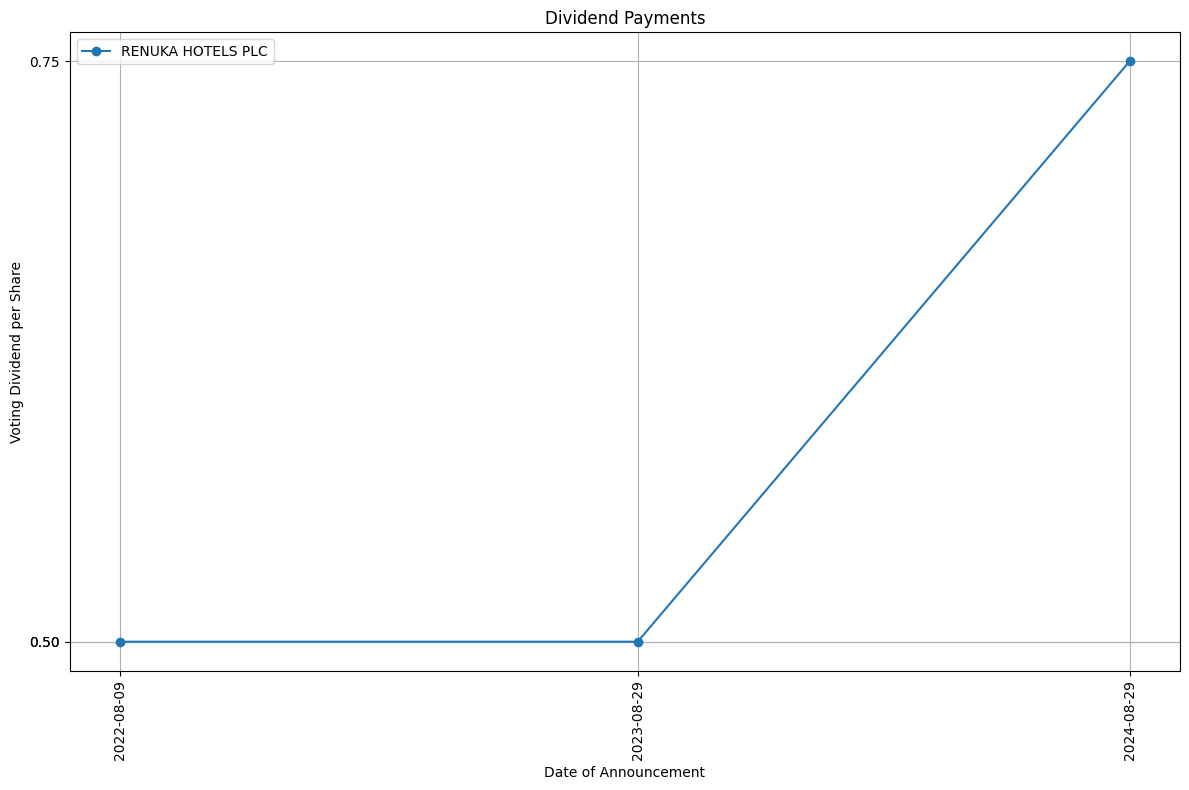

                               company date_of_announcement  \
id                                                            
10329  MALWATTE VALLEY PLANTATIONS PLC           2021-06-29   
15012  MALWATTE VALLEY PLANTATIONS PLC           2022-05-30   
19268  MALWATTE VALLEY PLANTATIONS PLC           2023-04-28   

       voting_div_per_share         xd  non_voting_div_per_share    payment  \
id                                                                            
10329                  0.10 2021-07-30                      0.10 2021-08-19   
15012                  0.12 2022-06-28                      0.12 2022-07-19   
19268                  0.16 2023-06-26                      0.16 2023-07-18   

      symbol  
id            
10329    MAL  
15012    MAL  
19268    MAL  


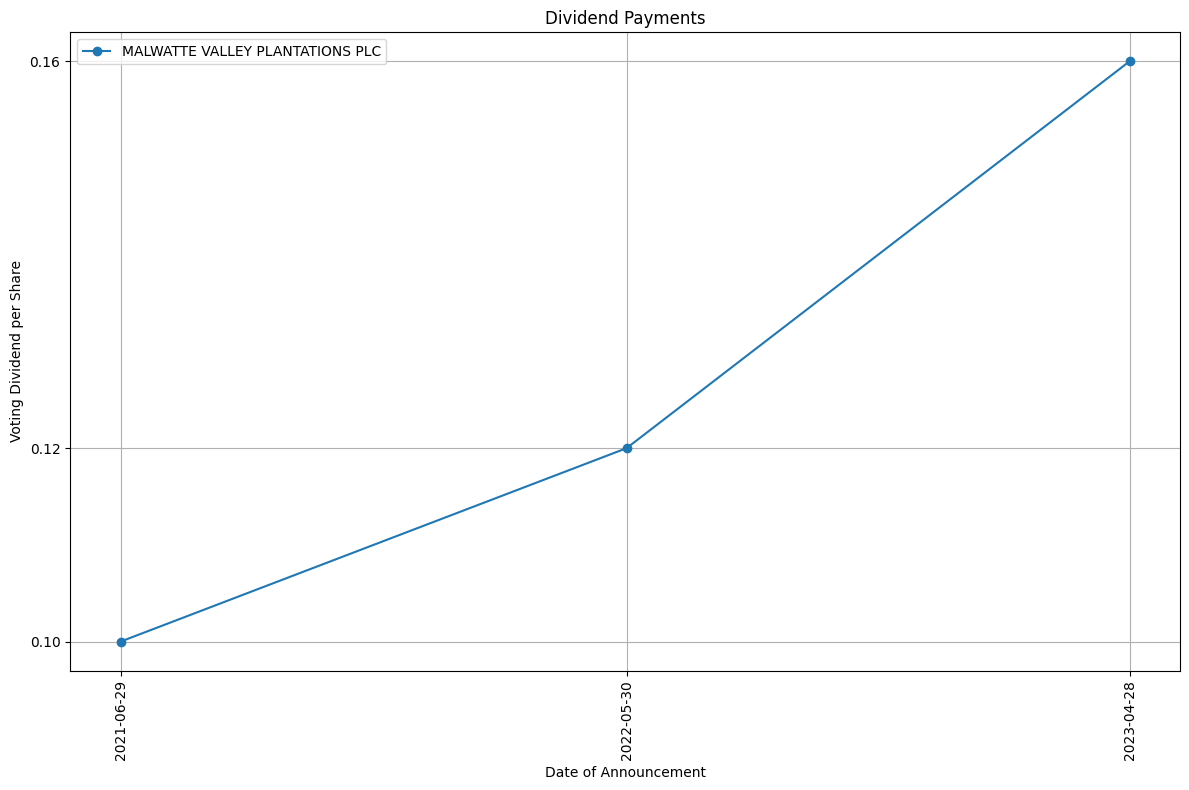

                company date_of_announcement  voting_div_per_share         xd  \
id                                                                              
1476   RENUKA FOODS PLC           2019-07-19                  0.35 2019-09-19   
6124   RENUKA FOODS PLC           2020-08-24                  0.35 2020-09-29   
16186  RENUKA FOODS PLC           2022-08-10                  0.41 2022-09-08   

       non_voting_div_per_share    payment symbol  
id                                                 
1476                       0.35 2019-09-26   COCO  
6124                       0.35 2020-10-20   COCO  
16186                      0.41 2022-09-27   COCO  


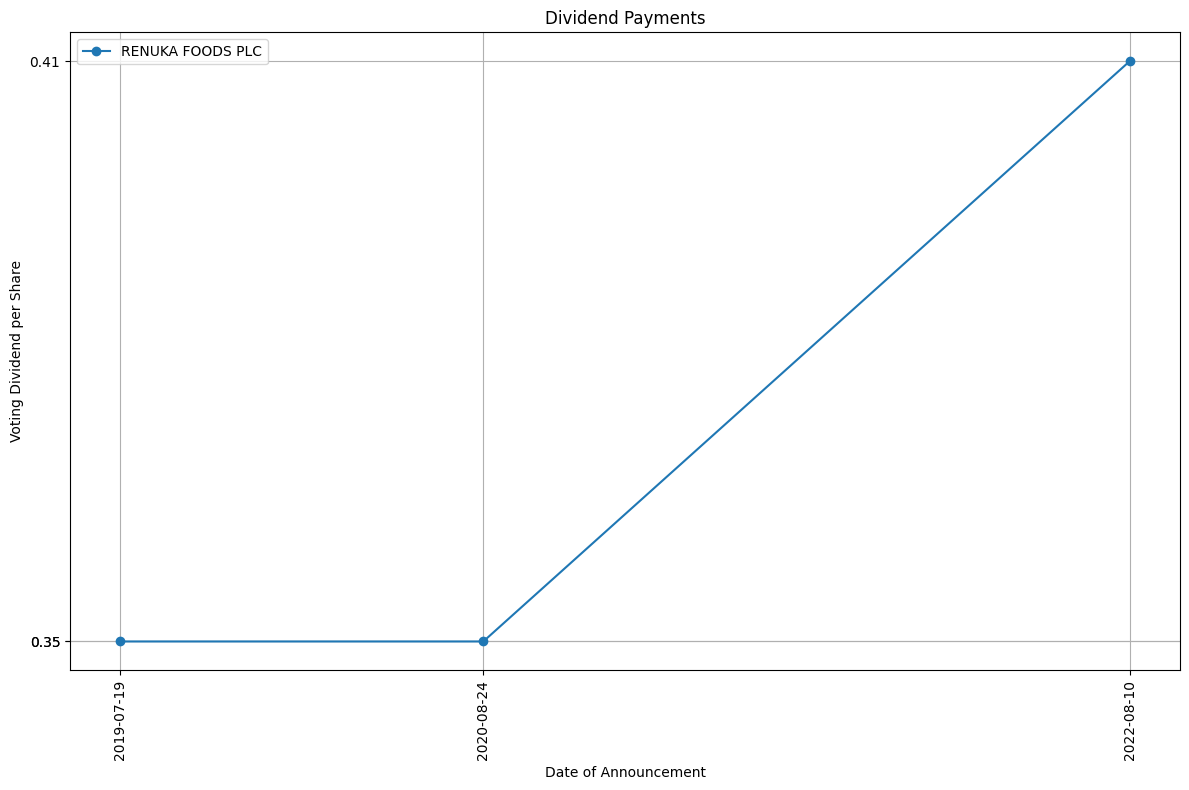

In [ ]:
for symbol in best_cmp_df.symbol.unique():
  # draw_plot_for_symbol(symbol)

In [ ]:
best_cmp_df.shape

(29, 6)